# Proyecto: Time Series Forecasting

## Importar librerías

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de fechas
from datetime import date

# Pruebas estadísticas y descomposición de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Análisis de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Validación cruzada para series temporales
from sklearn.model_selection import TimeSeriesSplit

# Modelado automático ARIMA
import pmdarima as pm

## Cargar dataset

In [5]:
# Cargar el CSV
df = pd.read_csv("/workspaces/efrainnalmeida-time-series-project-tutorial/acea_data/Aquifer_Petrignano.csv")

# Mostrar las primeras filas
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [6]:
# Ver la forma del DataFrame
print("Forma del dataset:", df.shape)

Forma del dataset: (5223, 8)


In [7]:
# Información general (columnas, tipos de datos, nulos)
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [8]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe().T


Estadísticas descriptivas:


count          mean          std  \
Rainfall_Bastia_Umbra                 4199.0      1.556633     5.217923   
Depth_to_Groundwater_P24              5168.0    -26.263723     3.319858   
Depth_to_Groundwater_P25              5184.0    -25.692926     3.214165   
Temperature_Bastia_Umbra              4199.0     15.030293     7.794871   
Temperature_Petrignano                4199.0     13.739081     7.701369   
Volume_C10_Petrignano                 5025.0 -29043.296726  4751.864371   
Hydrometry_Fiume_Chiascio_Petrignano  4199.0      2.372517     0.589088   

                                            min       25%       50%       75%  \
Rainfall_Bastia_Umbra                     0.000      0.00      0.00      0.10   
Depth_to_Groundwater_P24                -34.470    -28.25    -25.99    -23.82   
Depth_to_Groundwater_P25                -33.710    -27.62    -25.54    -23.43   
Temperature_Bastia_Umbra                 -3.700      8.80     14.70     21.40   
Temperature_Petrignano                   -4.200      7.70     13.50     20.00   
Volume_C10_Petrignano                -45544.896 -31678.56 -28689.12 -26218.08   
Hydrometry_Fiume_Chiascio_Petrignano      0.000      2.10      2.40      2.70   

                                        max  
Rainfall_Bastia_Umbra                 67.30  
Depth_to_Groundwater_P24             -19.66  
Depth_to_Groundwater_P25             -19.10  
Temperature_Bastia_Umbra              33.00  
Temperature_Petrignano                31.10  
Volume_C10_Petrignano                  0.00  
Hydrometry_Fiume_Chiascio_Petrignano   4.10

In [9]:
# Ver la correlación entre columnas candidatas a eliminar
print(df[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].corr())
print(df[['Temperature_Petrignano', 'Temperature_Bastia_Umbra']].corr())

                          Depth_to_Groundwater_P24  Depth_to_Groundwater_P25
Depth_to_Groundwater_P24                  1.000000                  0.997506
Depth_to_Groundwater_P25                  0.997506                  1.000000
                          Temperature_Petrignano  Temperature_Bastia_Umbra
Temperature_Petrignano                  1.000000                  0.835754
Temperature_Bastia_Umbra                0.835754                  1.000000


In [10]:
# Eliminar las filas con NaN en la lluvia
df = df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop=True)

In [11]:
# Información general (columnas, tipos de datos, nulos)
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              4160 non-null   float64
 3   Depth_to_Groundwater_P25              4172 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 4198 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 262.6+ KB


In [12]:
# Eliminar columnas no necesarias
df = df.drop(['Depth_to_Groundwater_P24','Temperature_Petrignano'], axis=1)

In [13]:
# Información general (columnas, tipos de datos, nulos)
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Volume_C10_Petrignano                 4198 non-null   float64
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [14]:
# Renombrar columnas
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [15]:
# Información general (columnas, tipos de datos, nulos)
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  4199 non-null   object 
 1   rainfall              4199 non-null   float64
 2   depth_to_groundwater  4172 non-null   float64
 3   temperature           4199 non-null   float64
 4   drainage_volume       4198 non-null   float64
 5   river_hydrometry      4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [16]:
# Definir targets y features
targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
# Mostrar targets y features
print("\nTargets:", targets)
print("Features:", features)


Targets: ['depth_to_groundwater']
Features: ['date', 'rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']


In [17]:
# Convertir la columna 'date' a datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [18]:
# Establecer 'date' como índice
df = df.set_index('date').sort_index()

## Visualización de variables en el tiempo

### Bloque total

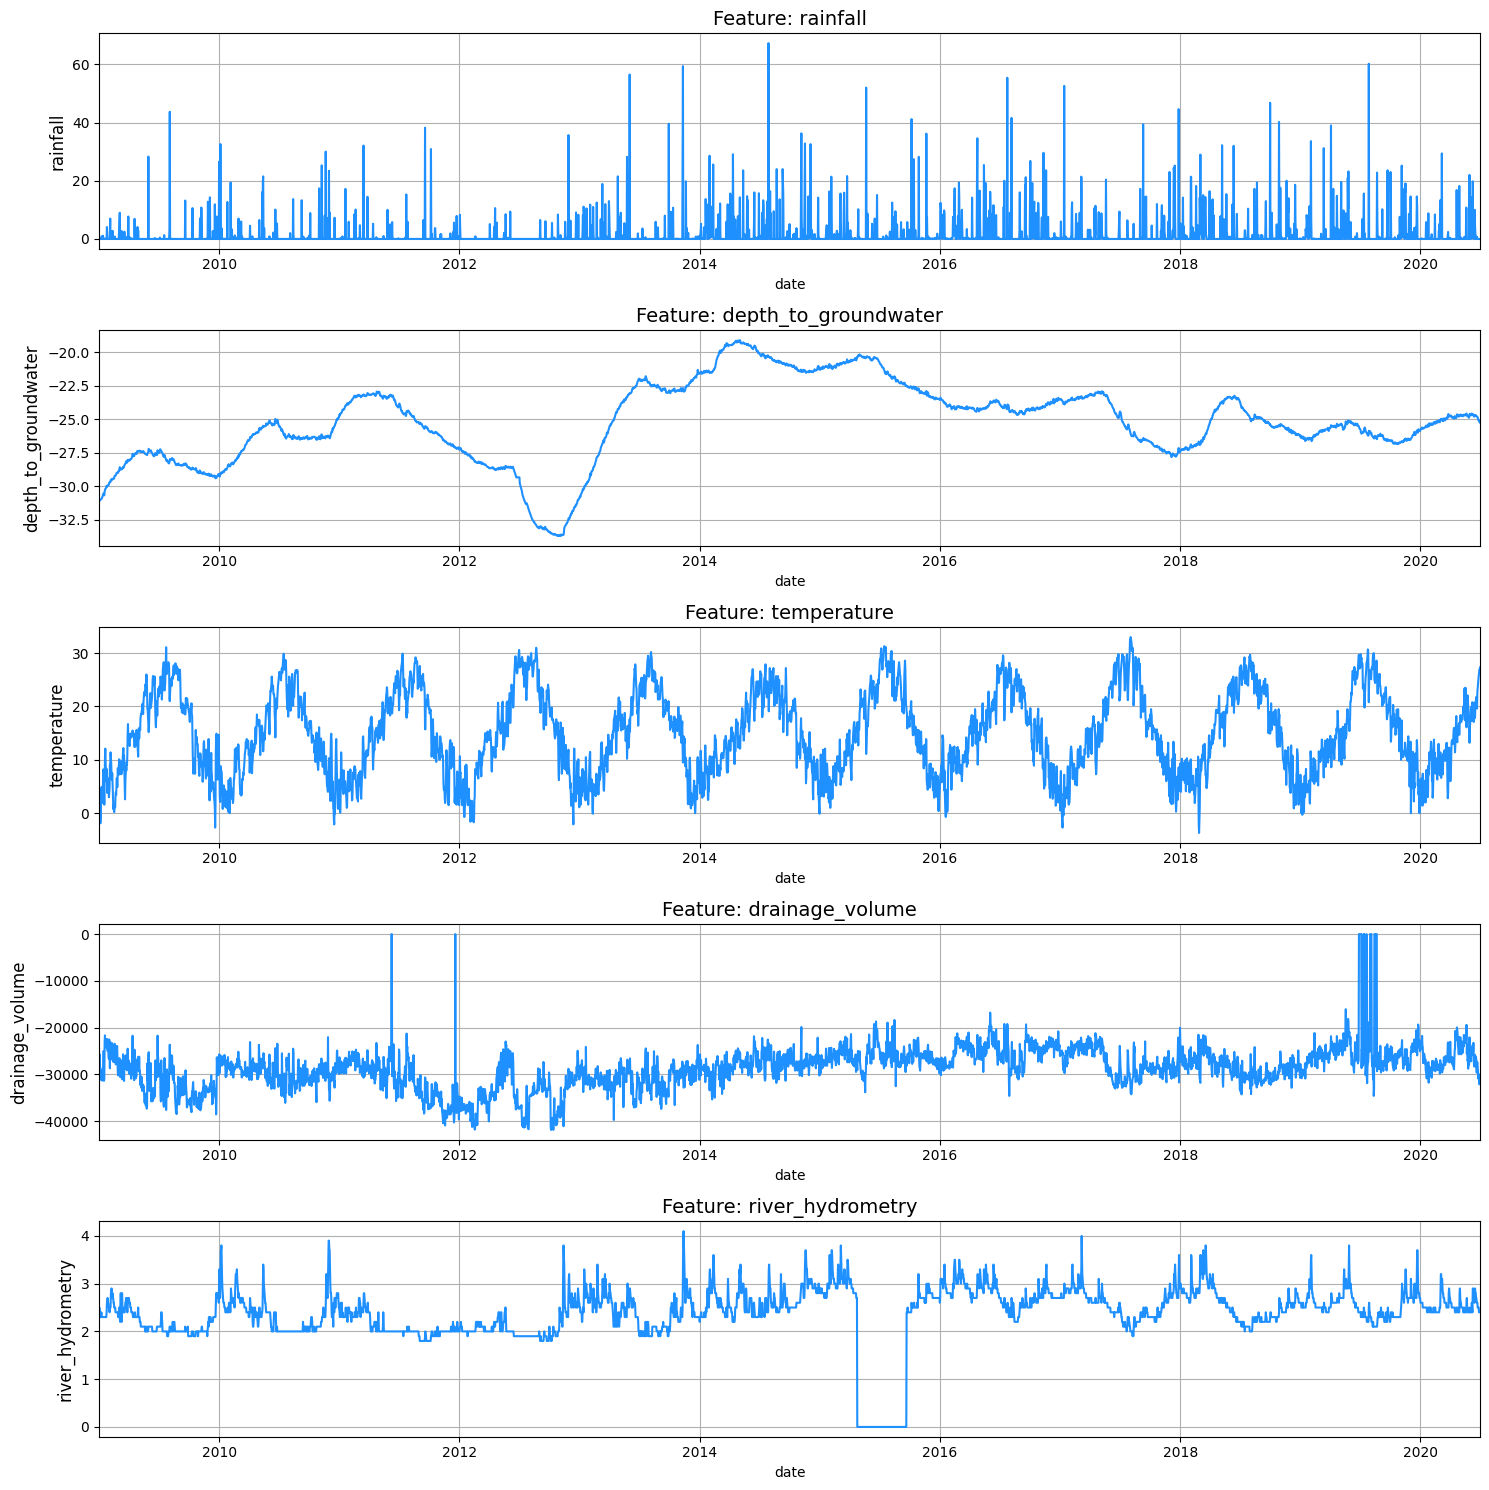

In [19]:
# Crear figura con subplots (uno por variable)
num_vars = len(df.columns)
f, ax = plt.subplots(nrows=num_vars, ncols=1, figsize=(15, 3 * num_vars))

# Si solo hay una variable, convertir ax en lista
if num_vars == 1:
    ax = [ax]

# Graficar cada variable con ffill()
for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column].ffill(), ax=ax[i], color='dodgerblue')
    ax[i].set_title(f'Feature: {column}', fontsize=14)
    ax[i].set_ylabel(column, fontsize=12)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i].grid(True)

plt.tight_layout()
plt.show()

### Bloque para hacer zoom de 2012 a 2014

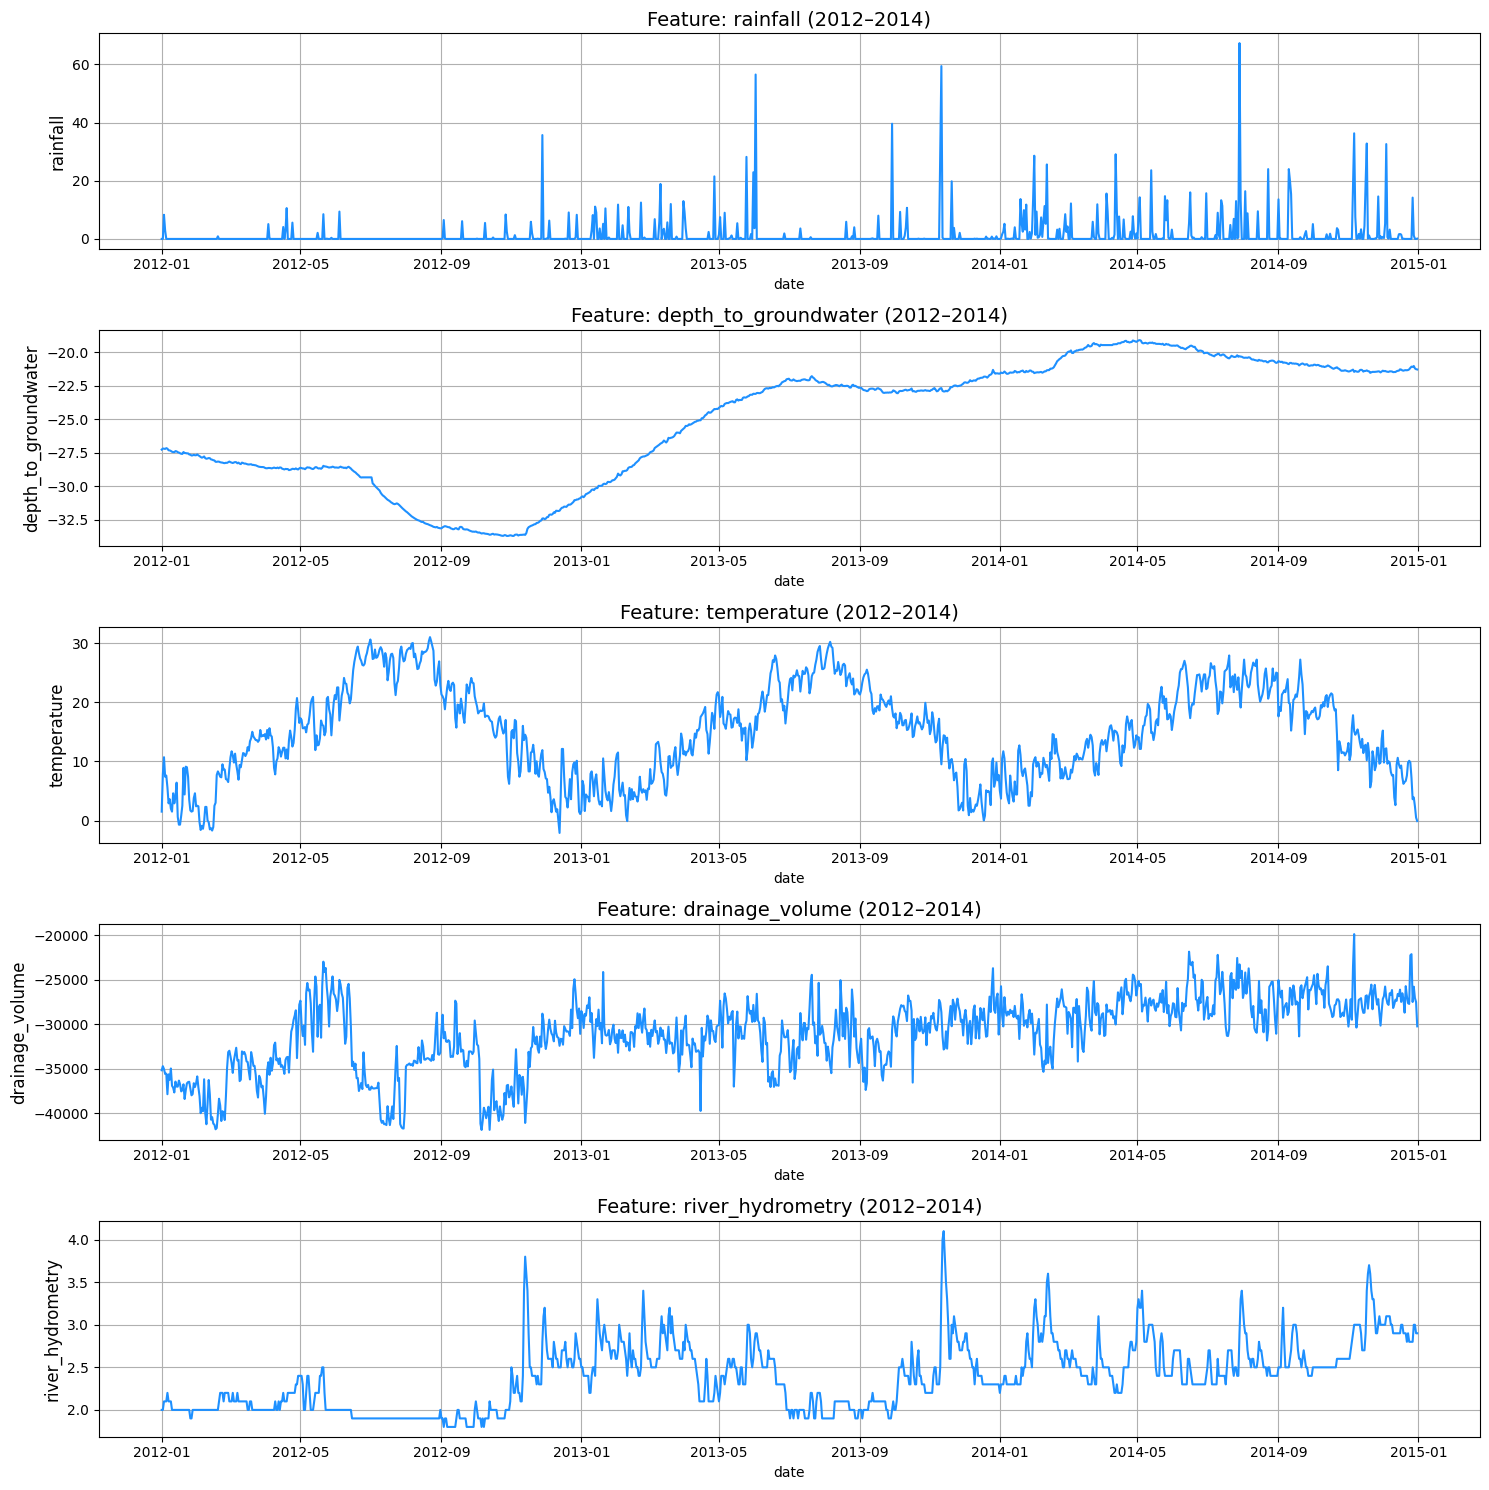

In [20]:
# Filtrar el DataFrame entre 2012 y 2014
df_zoom = df.loc['2012-01-01':'2014-12-31']

# Crear figura con subplots (uno por variable)
num_vars = len(df_zoom.columns)
f, ax = plt.subplots(nrows=num_vars, ncols=1, figsize=(15, 3 * num_vars))

# Si solo hay una variable, convertir ax en lista
if num_vars == 1:
    ax = [ax]

# Graficar cada variable
for i, column in enumerate(df_zoom.columns):
    sns.lineplot(x=df_zoom.index, y=df_zoom[column].ffill(), ax=ax[i], color='dodgerblue')
    ax[i].set_title(f'Feature: {column} (2012–2014)', fontsize=14)
    ax[i].set_ylabel(column, fontsize=12)
    ax[i].grid(True)

plt.tight_layout()
plt.show()

## Preprocesamiento de datos

### Chequeo de integridad temporal

In [21]:
delta = df.index.to_series().diff()

is_daily = (delta.dropna() == pd.Timedelta(days=1)).all()

if is_daily:
    print("✅ Las marcas de tiempo son diarias y están en orden cronológico.")
else:
    print("⚠️ Las marcas de tiempo NO son equidistantes.")
    print(delta.value_counts())

✅ Las marcas de tiempo son diarias y están en orden cronológico.


### Identificación y tratamiento de valores faltantes

#### Identificar valores igual a 0

🔍 Conteo de valores igual a 0 por columna (solo numéricas):
rainfall                3147
depth_to_groundwater       0
temperature                7
drainage_volume           25
river_hydrometry         150
dtype: int64


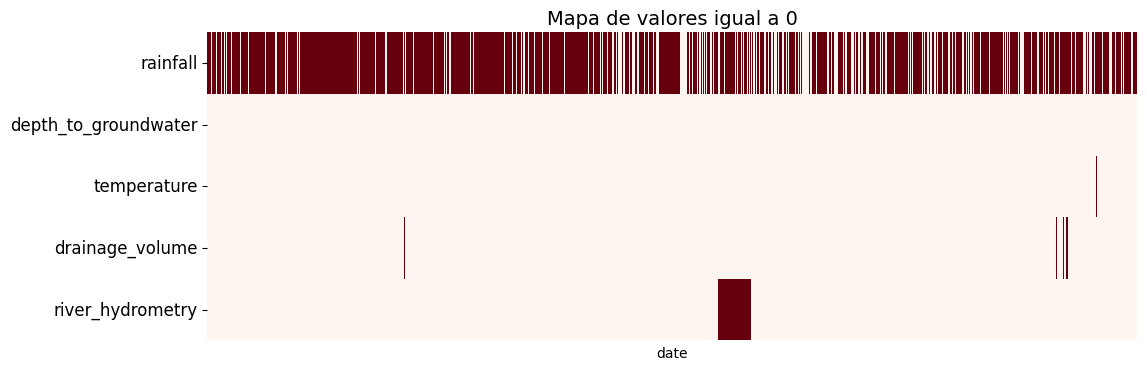

In [22]:
print("🔍 Conteo de valores igual a 0 por columna (solo numéricas):")
zero_counts = (df == 0).sum()
print(zero_counts)

# Visualización en forma de mapa de calor
plt.figure(figsize=(12, 4))
sns.heatmap((df == 0).T, cmap='Reds', cbar=False)
plt.title("Mapa de valores igual a 0", fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xticks([])
plt.show()

#### Identificar valores faltantes

🔍 Valores nulos por columna:
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64


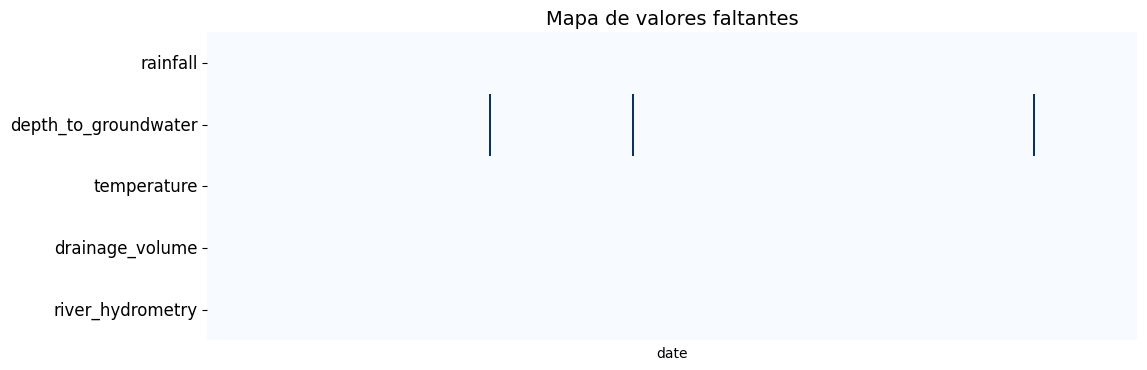

In [23]:
print("🔍 Valores nulos por columna:")
print(df.isna().sum())

plt.figure(figsize=(12, 4))
sns.heatmap(df.T.isna(), cmap='Blues', cbar=False)
plt.title("Mapa de valores faltantes", fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xticks([])
plt.show()

##### 📌 Diagnóstico por variable

| Variable            | NaN  | 0    | Comentario                                                                 |
|---------------------|------|------|-----------------------------------------------------------------------------|
| **rainfall**        | 0    | 3147 | ✔️ Esperado: muchos días sin lluvia legítimos.                             |
| **depth_to_groundwater** | 27   | 0    | ❗ Tiene NaNs reales. Ceros son válidos (si existieran).                    |
| **temperature**     | 0    | 7    | ⚠️ Sospechoso: temperaturas de 0 °C podrían indicar error si son en verano. |
| **drainage_volume** | 1    | 25   | ⚠️ Sospechoso: volumen 0 suele ser poco realista. Conviene tratarlos como NaN. |
| **river_hydrometry**| 0    | 150  | ⚠️ Sospechoso: nivel de río 0 m también suena como dato ausente mal codificado. |


#### Reemplazar ceros sospechosos por NaN

In [24]:
df['temperature'] = df['temperature'].replace(0, np.nan)
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

🔍 Valores nulos por columna:
rainfall                  0
depth_to_groundwater     27
temperature               7
drainage_volume          26
river_hydrometry        150
dtype: int64


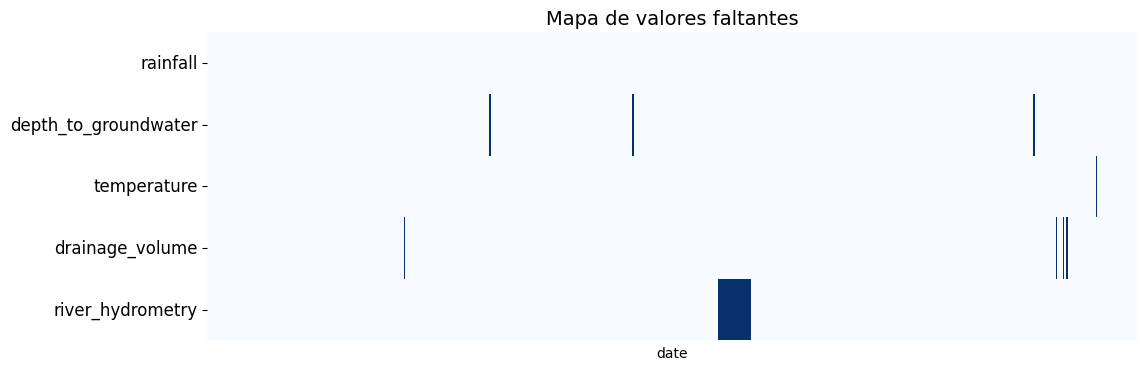

In [25]:
print("🔍 Valores nulos por columna:")
print(df.isna().sum())

plt.figure(figsize=(12, 4))
sns.heatmap(df.T.isna(), cmap='Blues', cbar=False)
plt.title("Mapa de valores faltantes", fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xticks([])
plt.show()

#### Función para visualizar imputación

In [26]:
def plot_imputation_comparison(series, name, zoom_start=None, zoom_end=None):
    import matplotlib.dates as mdates

    methods = {
        'Fill with 0': series.fillna(0),
        'Fill with mean': series.fillna(series.mean()),
        'Forward fill': series.ffill(),
        'Interpolate': series.interpolate()
    }

    fig, ax = plt.subplots(nrows=len(methods), ncols=1, figsize=(15, 3.5 * len(methods)))

    for i, (label, filled_series) in enumerate(methods.items()):
        # Línea completa con imputación
        ax[i].plot(series.index, filled_series, label='Imputed', color='darkorange', linewidth=2)

        # Solo muestra el valor original donde NO hay NaNs
        ax[i].plot(series[series.notna()].index, series[series.notna()],
                   label='Original', color='steelblue', linestyle='--', alpha=0.6)

        # Opcional: marcar los puntos imputados
        imputed_points = series.isna()
        ax[i].scatter(series.index[imputed_points],
                      filled_series[imputed_points],
                      color='red', label='Imputed points', s=10, zorder=5)

        ax[i].set_title(f'{name} – {label}', fontsize=14)
        ax[i].set_ylabel(name)
        if zoom_start and zoom_end:
            ax[i].set_xlim([zoom_start, zoom_end])
        ax[i].legend()
        ax[i].grid(True)
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()

#### Visualización para Drainage Volume

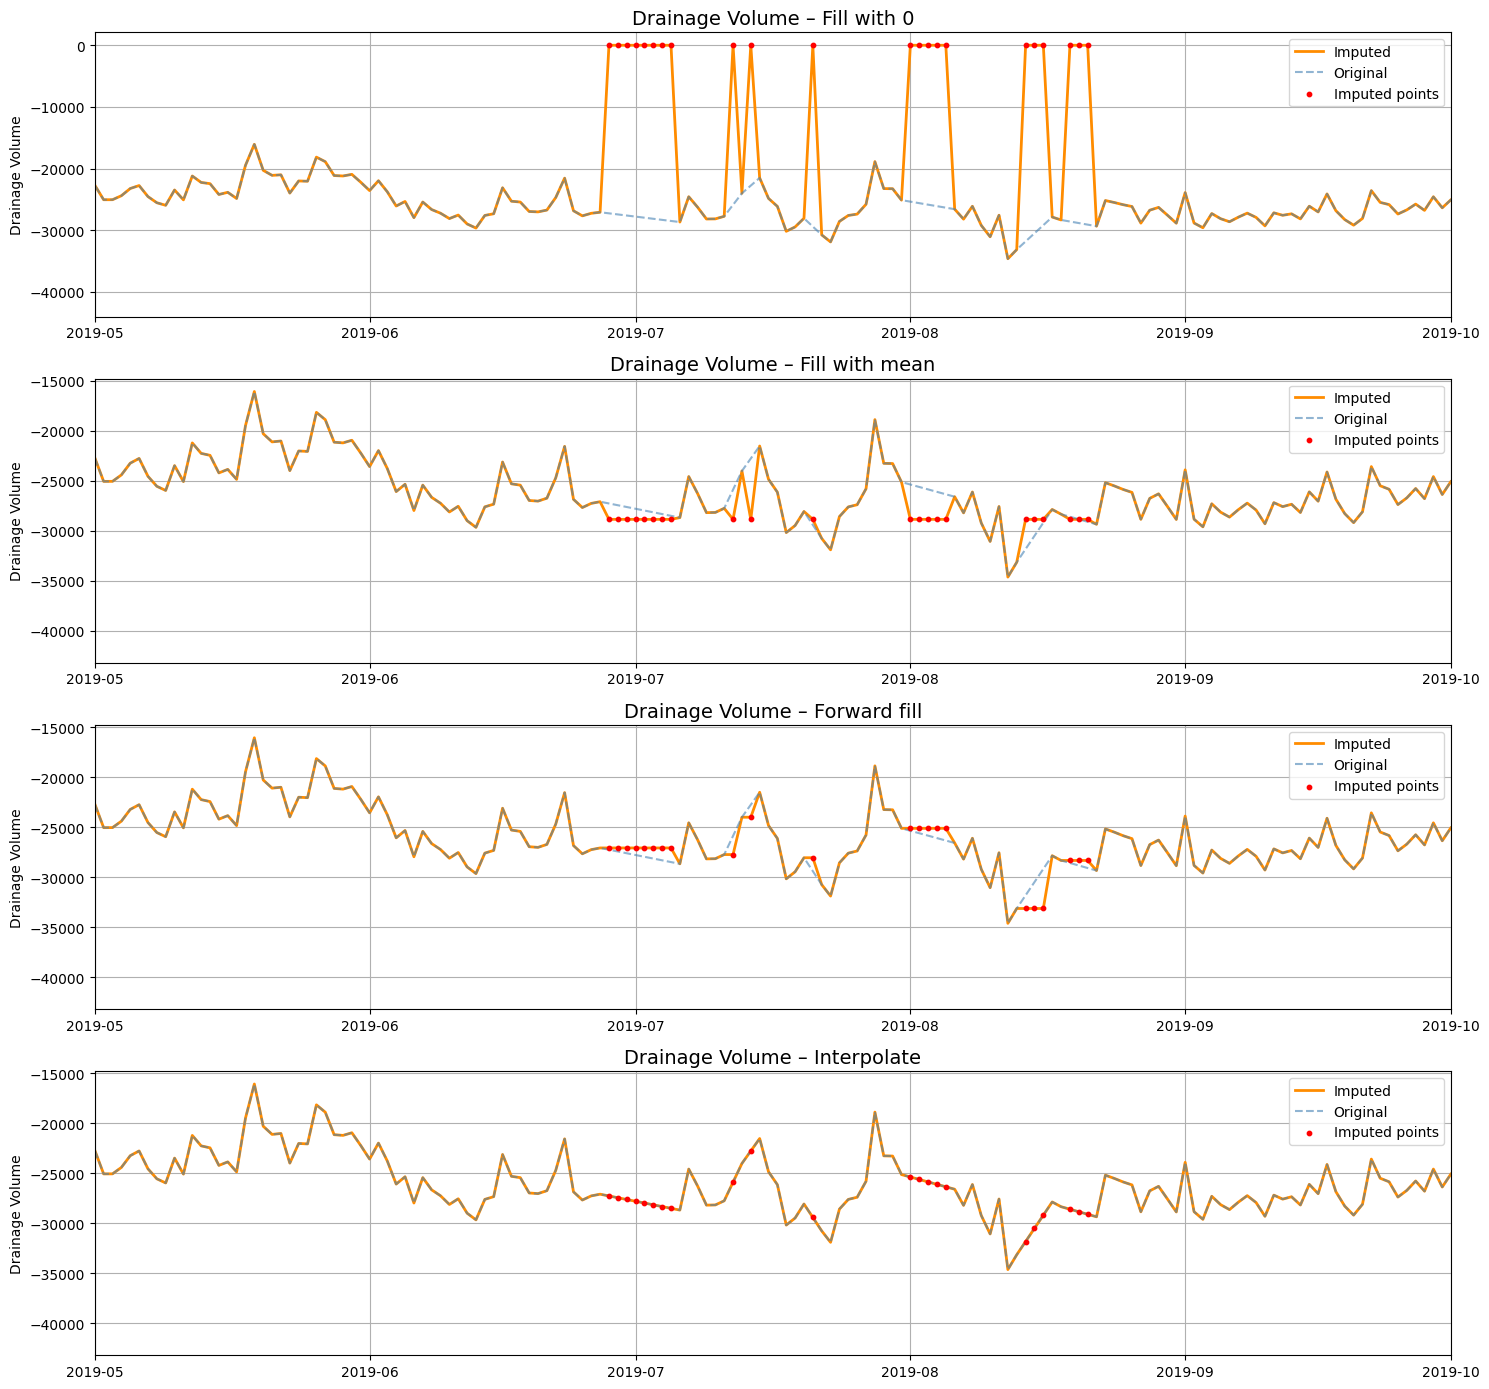

In [27]:
plot_imputation_comparison(df['drainage_volume'], 'Drainage Volume',
                           zoom_start=date(2019, 5, 1), zoom_end=date(2019, 10, 1))

#### Imputación definitiva (interpolate + bfill/ffill)

In [28]:
cols_to_fill = ['drainage_volume', 'river_hydrometry', 'depth_to_groundwater']

for col in cols_to_fill:
    df[col] = df[col].interpolate().bfill().ffill()

#### Verificación final

In [29]:
print("\n✅ Verificación final de valores nulos:")
print(df.isna().sum())


✅ Verificación final de valores nulos:
rainfall                0
depth_to_groundwater    0
temperature             7
drainage_volume         0
river_hydrometry        0
dtype: int64


### Suavizado de datos / Remuestreo

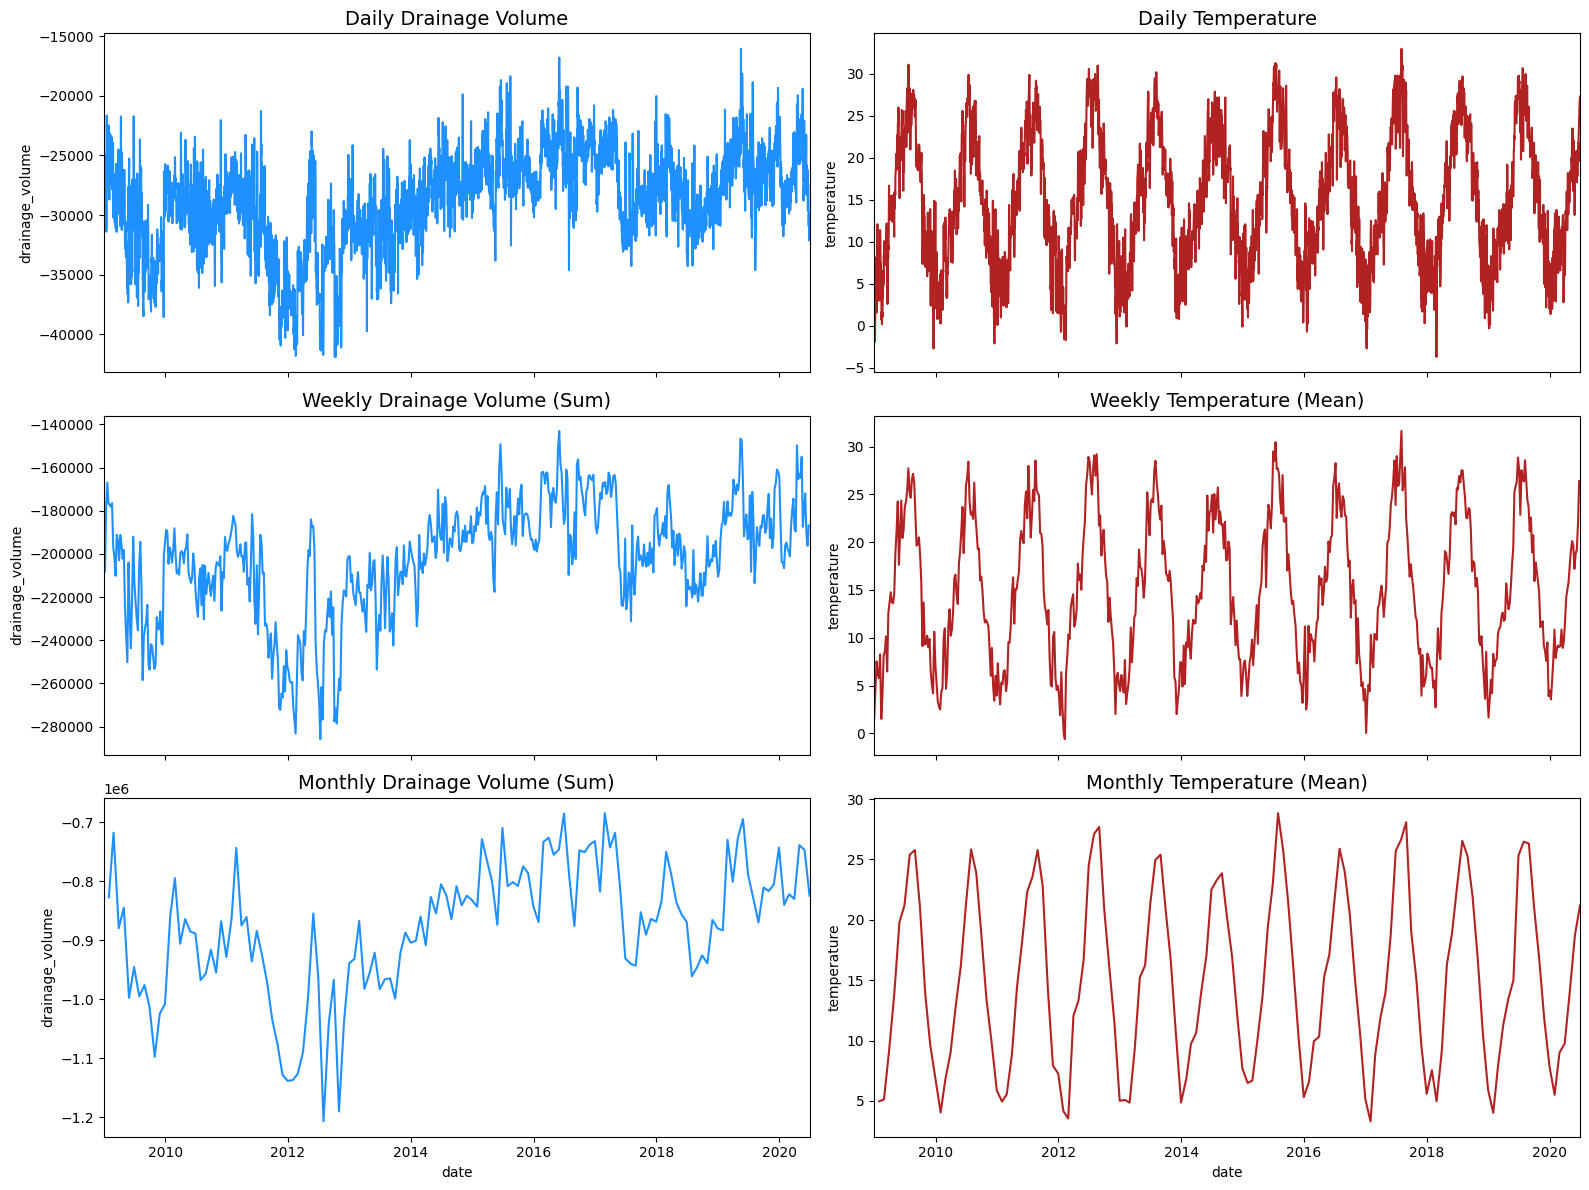

In [30]:
# Verificar que el índice sea datetime
df.index = pd.to_datetime(df.index)

# Visualización de remuestreo: Drainage Volume y Temperature
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

# -------------------
# Drainage Volume
# -------------------
sns.lineplot(x=df.index, y=df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Drainage Volume', fontsize=14)

weekly_drainage = df['drainage_volume'].resample('7D').sum()
sns.lineplot(x=weekly_drainage.index, y=weekly_drainage, color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume (Sum)', fontsize=14)

monthly_drainage = df['drainage_volume'].resample('ME').sum()
sns.lineplot(x=monthly_drainage.index, y=monthly_drainage, color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume (Sum)', fontsize=14)

# -------------------
# Temperature
# -------------------
sns.lineplot(x=df.index, y=df['temperature'], color='firebrick', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature', fontsize=14)

weekly_temp = df['temperature'].resample('7D').mean()
sns.lineplot(x=weekly_temp.index, y=weekly_temp, color='firebrick', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Mean)', fontsize=14)

monthly_temp = df['temperature'].resample('ME').mean()
sns.lineplot(x=monthly_temp.index, y=monthly_temp, color='firebrick', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Mean)', fontsize=14)

# -------------------
# Ajustar límites
# -------------------
for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [31]:
# Remuestreo semanal
df_mean = df.drop(columns='rainfall').resample('7D').mean()
df_sum = df[['rainfall']].resample('7D').sum()

# Combinar y guardar como df
df = pd.concat([df_mean, df_sum], axis=1).reset_index()

### Estacionariedad

#### Verificar visualmente

In [32]:
# Definir función para verificar estacionariedad gráficamente
def plot_stationarity_check(df, column, rolling_window=52, start=None, end=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import date

    fig, ax = plt.subplots(figsize=(15, 6))

    sns.lineplot(x=df['date'], y=df[column], ax=ax, color='dodgerblue', label='Original')
    sns.lineplot(x=df['date'], y=df[column].rolling(rolling_window).mean(), ax=ax, color='black', label='Rolling Mean')
    sns.lineplot(x=df['date'], y=df[column].rolling(rolling_window).std(), ax=ax, color='orange', label='Rolling Std')

    ax.set_title(f'{column} – Estacionariedad Visual', fontsize=14)
    ax.set_ylabel(column, fontsize=12)
    if start and end:
        ax.set_xlim([start, end])
    ax.grid(True)
    plt.tight_layout()
    plt.show()

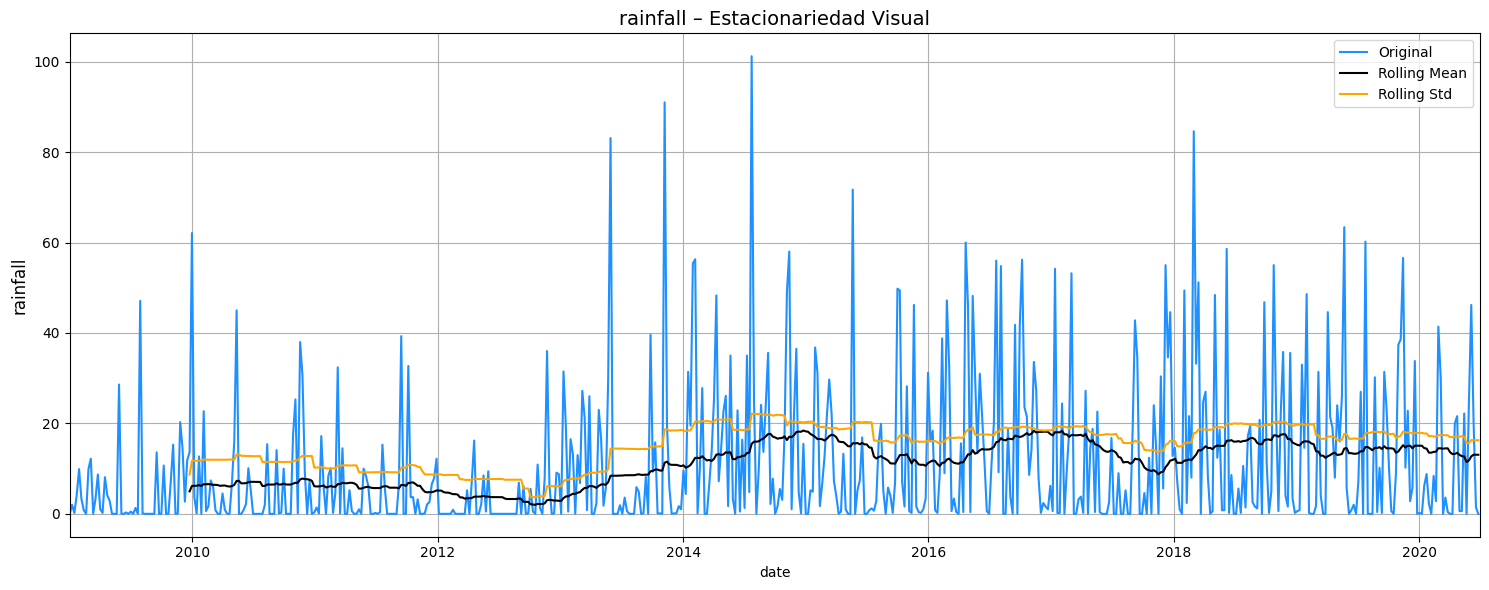

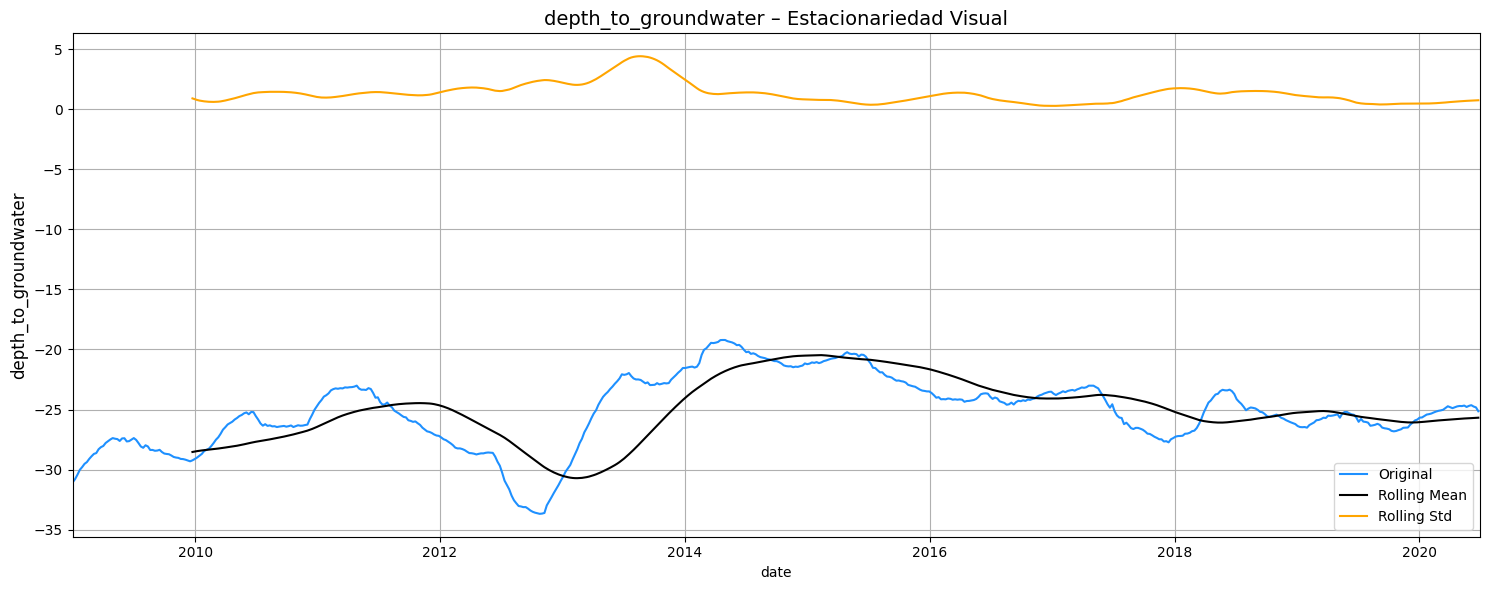

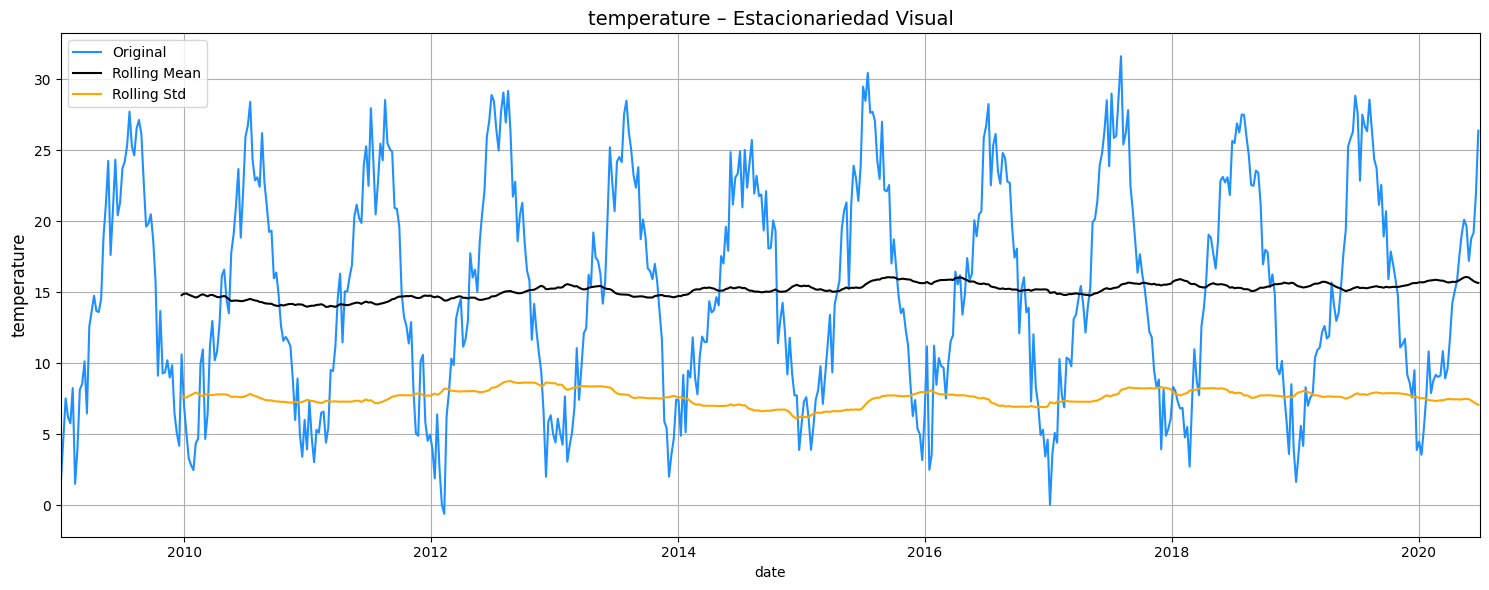

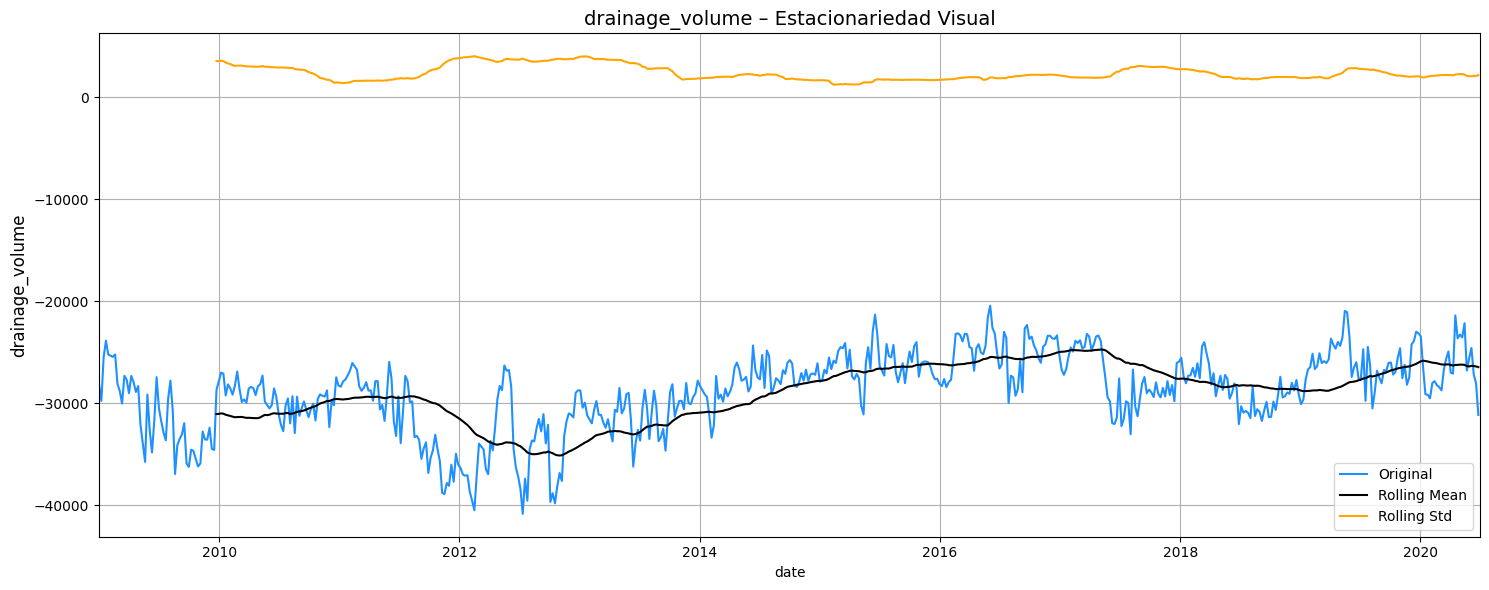

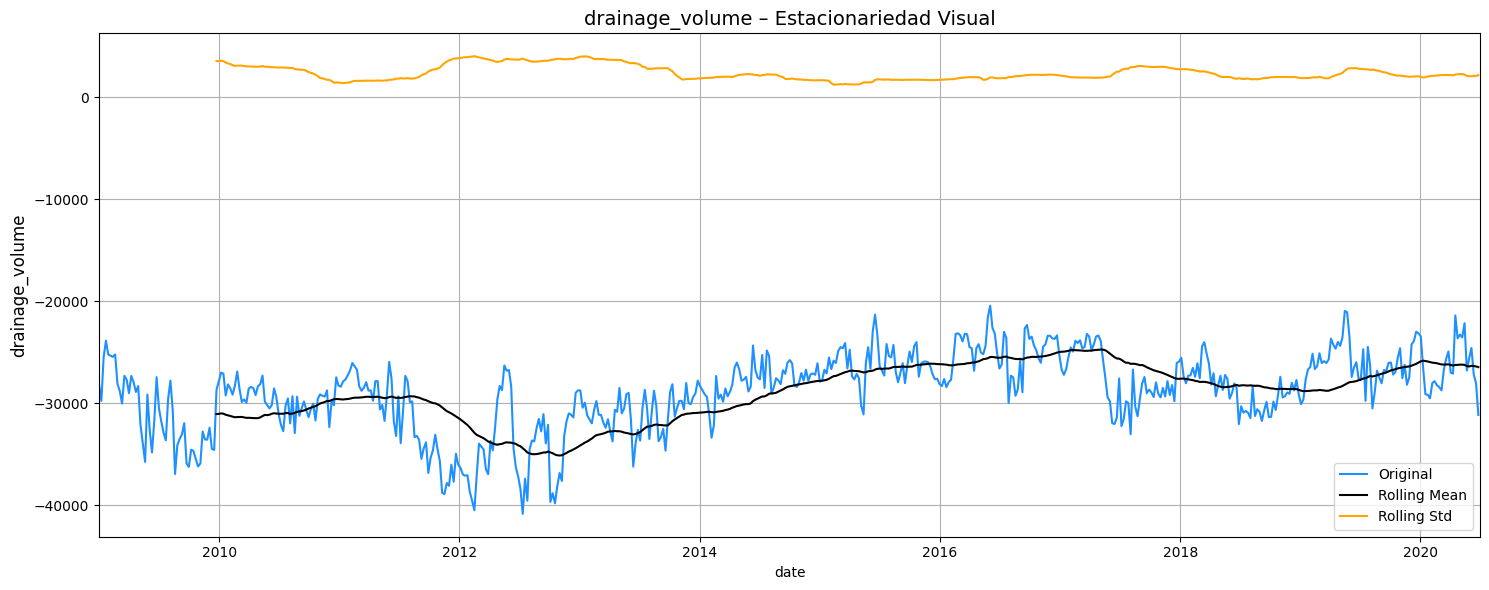

In [33]:
plot_stationarity_check(df, 'rainfall', start=date(2009, 1, 1), end=date(2020, 6, 30))
plot_stationarity_check(df, 'depth_to_groundwater', start=date(2009, 1, 1), end=date(2020, 6, 30))
plot_stationarity_check(df, 'temperature', start=date(2009, 1, 1), end=date(2020, 6, 30))
plot_stationarity_check(df, 'drainage_volume', start=date(2009, 1, 1), end=date(2020, 6, 30))
plot_stationarity_check(df, 'drainage_volume', start=date(2009, 1, 1), end=date(2020, 6, 30))

#### Prueba de raíz unitaria

In [34]:
# Prueba de Dickey-Fuller
def test_adf(series, name, alpha=0.05):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"📊 Prueba Dickey-Fuller para: {name}")
    print(f"→ Estadístico ADF: {result[0]:.4f}")
    print(f"→ p-value: {result[1]:.4f}")
    print(f"→ Lags usados: {result[2]}")
    print(f"→ Número de observaciones: {result[3]}")
    print(f"→ Valores críticos:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    
    if result[1] <= alpha:
        print(f"\n✅ Con p-value ≤ {alpha}, rechazamos H₀: la serie es *estacionaria*.")
    else:
        print(f"\n❌ Con p-value > {alpha}, no podemos rechazar H₀: la serie *no es estacionaria*.")

# Ejemplo de uso
test_adf(df['rainfall'], 'Rainfall')
test_adf(df['depth_to_groundwater'], 'Depth to Groundwater')
test_adf(df['temperature'], 'Temperature')
test_adf(df['drainage_volume'], 'Drainage Volume')
test_adf(df['river_hydrometry'], 'River Hydrometry')

📊 Prueba Dickey-Fuller para: Rainfall
→ Estadístico ADF: -3.3739
→ p-value: 0.0119
→ Lags usados: 15
→ Número de observaciones: 584
→ Valores críticos:
   1%: -3.4416
   5%: -2.8665
   10%: -2.5694

✅ Con p-value ≤ 0.05, rechazamos H₀: la serie es *estacionaria*.
📊 Prueba Dickey-Fuller para: Depth to Groundwater
→ Estadístico ADF: -2.8802
→ p-value: 0.0477
→ Lags usados: 7
→ Número de observaciones: 592
→ Valores críticos:
   1%: -3.4414
   5%: -2.8664
   10%: -2.5694

✅ Con p-value ≤ 0.05, rechazamos H₀: la serie es *estacionaria*.
📊 Prueba Dickey-Fuller para: Temperature
→ Estadístico ADF: -12.0363
→ p-value: 0.0000
→ Lags usados: 17
→ Número de observaciones: 582
→ Valores críticos:
   1%: -3.4416
   5%: -2.8665
   10%: -2.5694

✅ Con p-value ≤ 0.05, rechazamos H₀: la serie es *estacionaria*.
📊 Prueba Dickey-Fuller para: Drainage Volume
→ Estadístico ADF: -3.0098
→ p-value: 0.0340
→ Lags usados: 9
→ Número de observaciones: 590
→ Valores críticos:
   1%: -3.4415
   5%: -2.8665
   10

##### ✅ Resumen de resultados ADF

| Variable              | ADF Statistic | p-value | ¿Estacionaria? |
|-----------------------|---------------|---------|----------------|
| **Rainfall**          | -3.37         | 0.0119  | ✅ Sí           |
| **Depth to Groundwater** | -2.88     | 0.0477  | ✅ Sí           |
| **Temperature**       | -12.04        | 0.0000  | ✅ Sí           |
| **Drainage Volume**   | -3.01         | 0.0340  | ✅ Sí           |
| **River Hydrometry**  | -4.82         | 0.0000  | ✅ Sí           |


#### Differencing

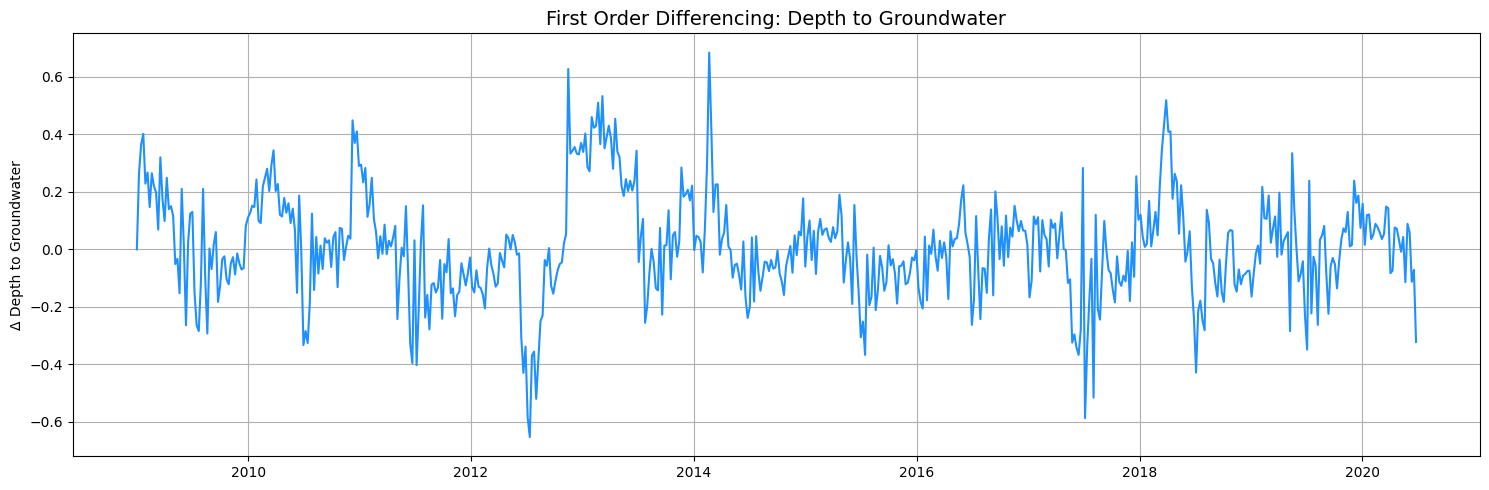

📊 Prueba Dickey-Fuller para: Differenced Depth to Groundwater
→ Estadístico ADF: -5.1496
→ p-value: 0.0000
→ Lags usados: 6
→ Número de observaciones: 593
→ Valores críticos:
   1%: -3.4414
   5%: -2.8664
   10%: -2.5694

✅ Con p-value ≤ 0.05, rechazamos H₀: la serie es *estacionaria*.


In [35]:
# Diferenciación
df['depth_to_groundwater_diff_1'] = df['depth_to_groundwater'].diff().fillna(0)

# Visualización
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['depth_to_groundwater_diff_1'], color='dodgerblue')
plt.title("First Order Differencing: Depth to Groundwater", fontsize=14)
plt.ylabel("Δ Depth to Groundwater")
plt.grid(True)
plt.tight_layout()
plt.show()

# Prueba ADF
test_adf(df['depth_to_groundwater_diff_1'], 'Differenced Depth to Groundwater')

### Ingeniería de características

#### Descomposición de series temporales

In [36]:
# Descomposición estacional
core_columns = ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry', 'depth_to_groundwater']

for column in core_columns:
    decomposition = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomposition.trend
    df[f"{column}_seasonal"] = decomposition.seasonal

In [37]:
# Definir función para descomposición estacional
def plot_decomposition(series, period=52, model='additive', title=''):

    result = seasonal_decompose(series, period=period, model=model, extrapolate_trend='freq')

    fig, axs = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
    axs[0].plot(result.observed, color='dodgerblue')
    axs[0].set_ylabel("Observed")
    axs[1].plot(result.trend, color='dodgerblue')
    axs[1].set_ylabel("Trend")
    axs[2].plot(result.seasonal, color='dodgerblue')
    axs[2].set_ylabel("Seasonal")
    axs[3].plot(result.resid, color='dodgerblue')
    axs[3].set_ylabel("Residual")

    fig.suptitle(f"Seasonal Decomposition: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()

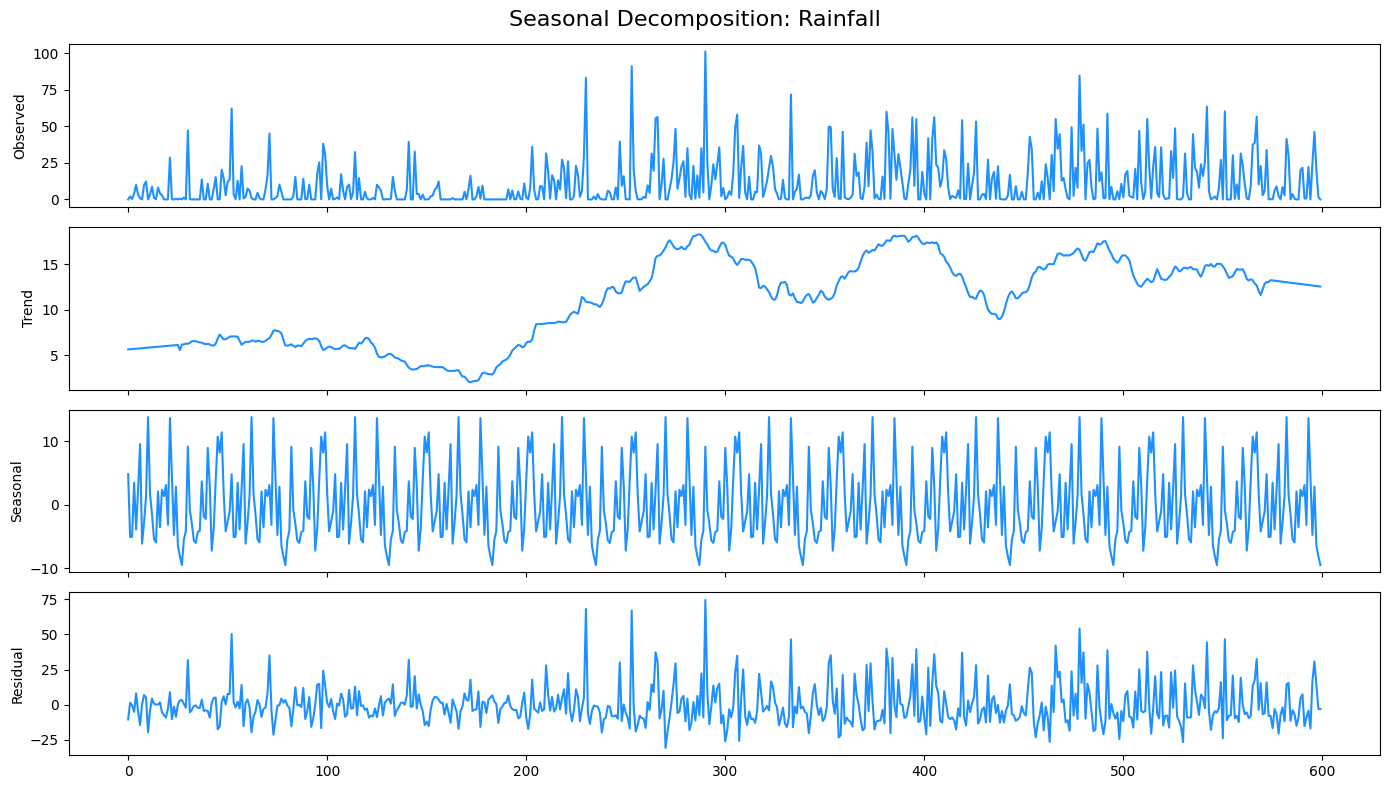

In [38]:
plot_decomposition(df['rainfall'], title='Rainfall')

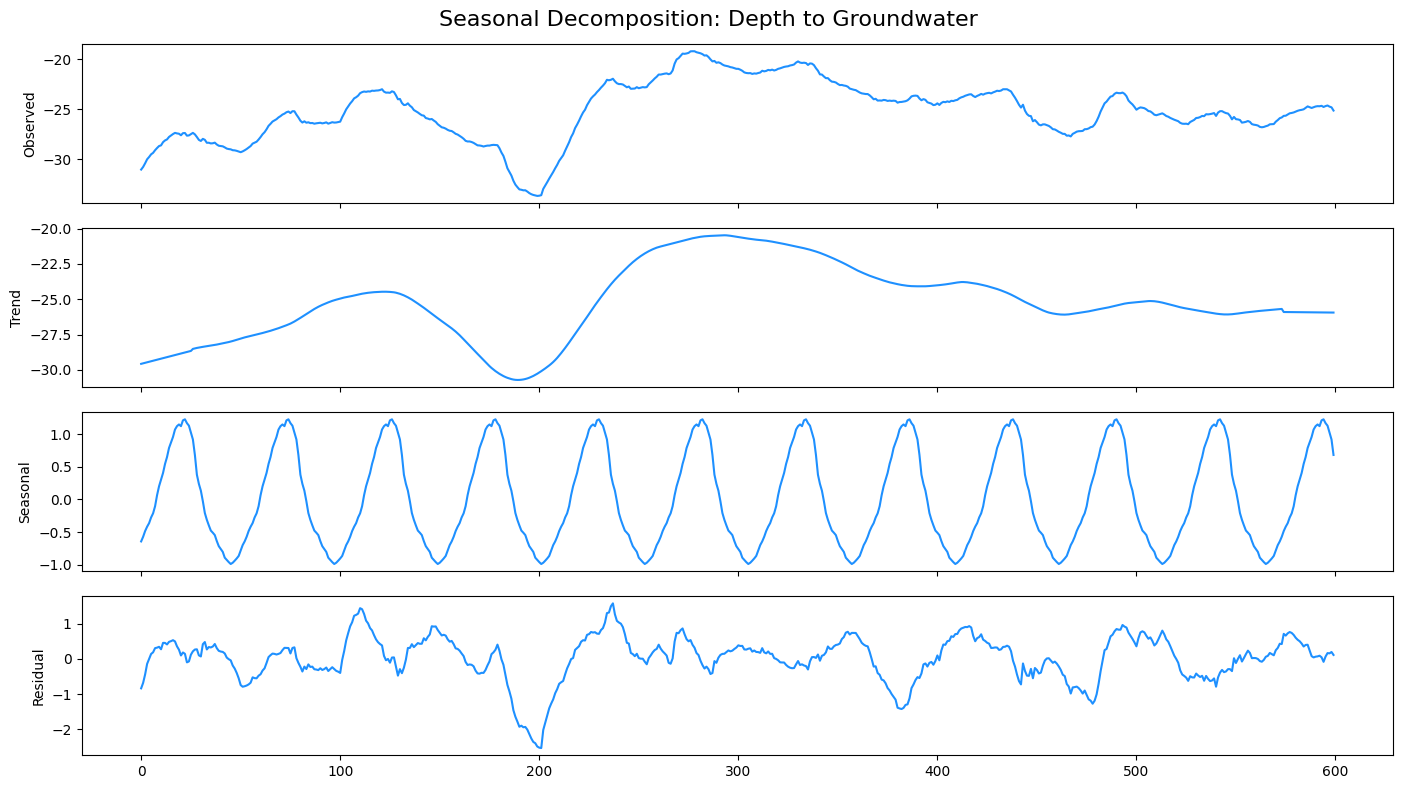

In [39]:
plot_decomposition(df['depth_to_groundwater'], title='Depth to Groundwater')

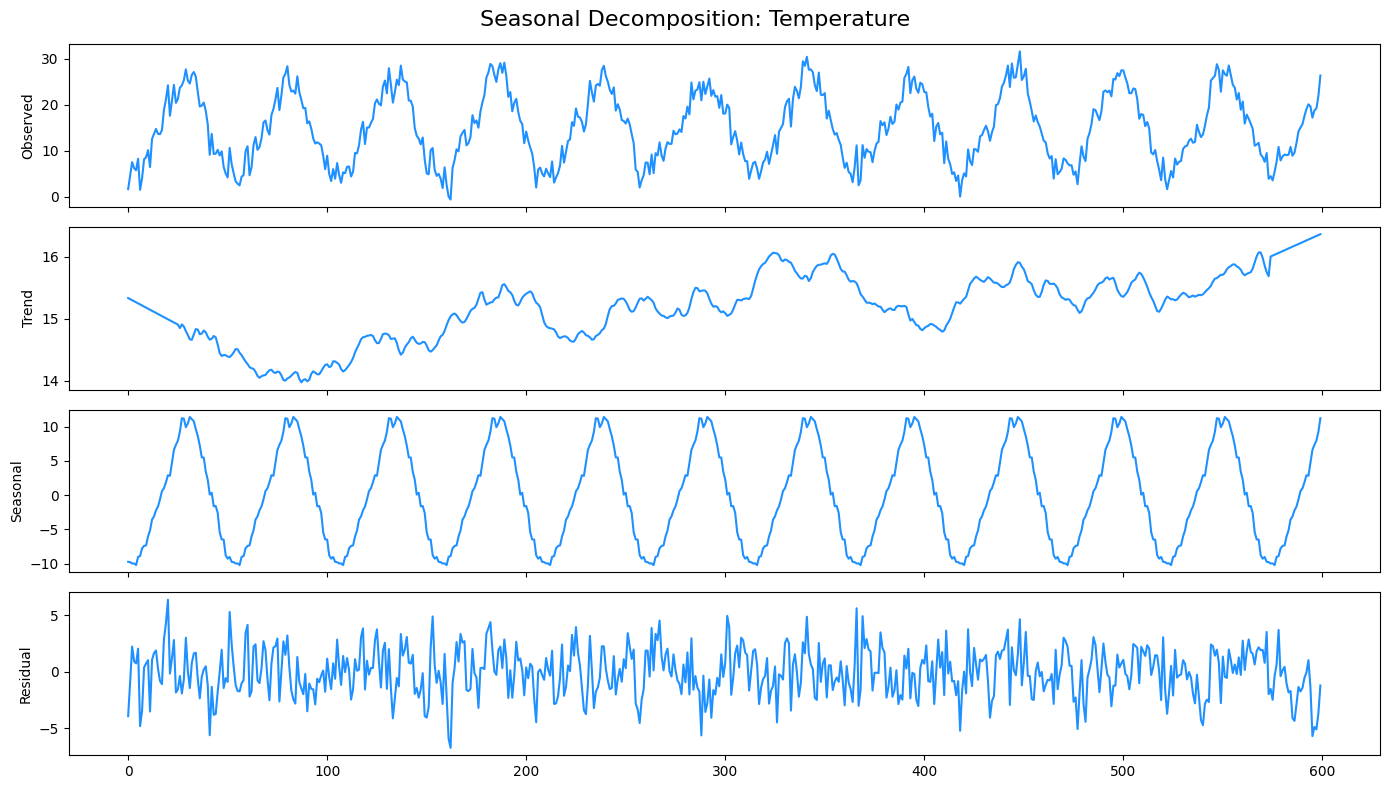

In [40]:
plot_decomposition(df['temperature'], title='Temperature')

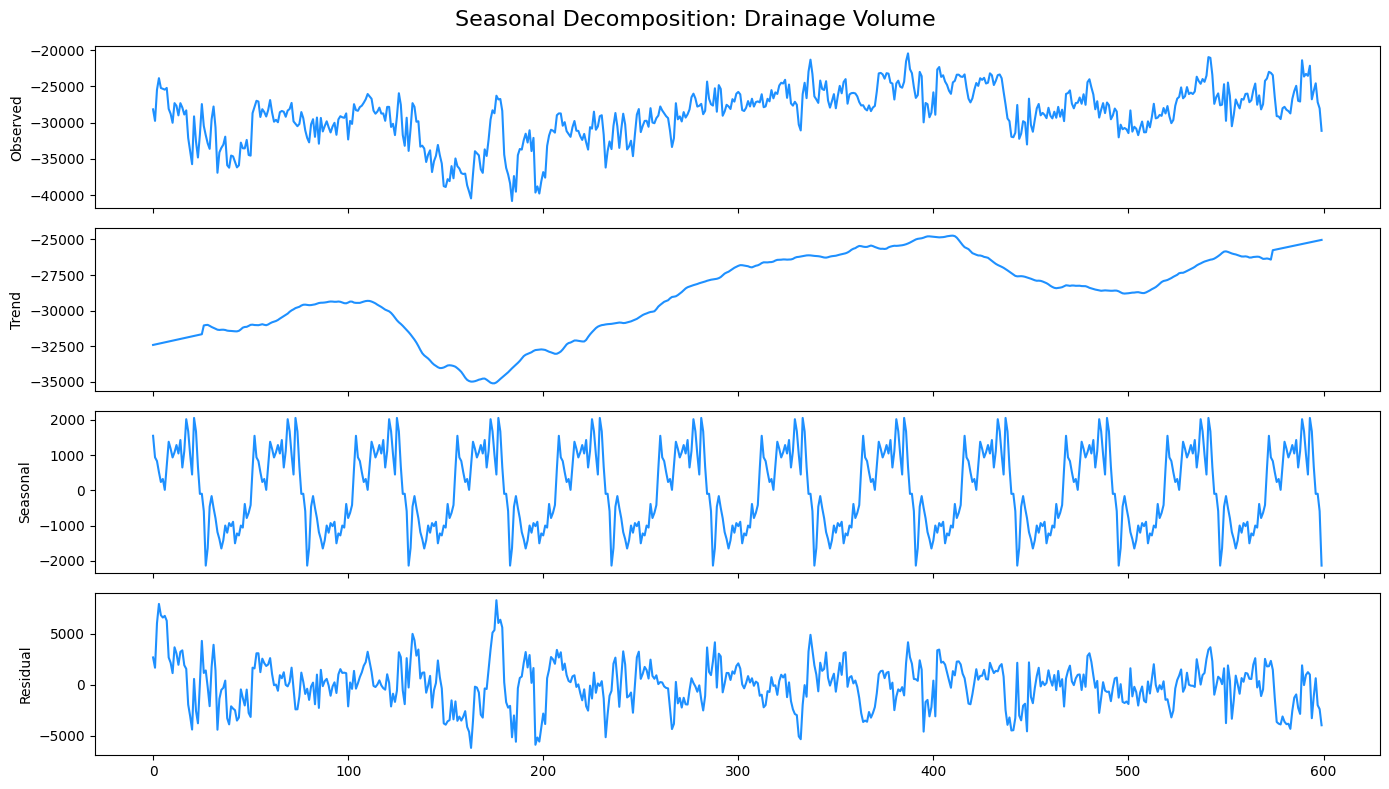

In [41]:
plot_decomposition(df['drainage_volume'], title='Drainage Volume')

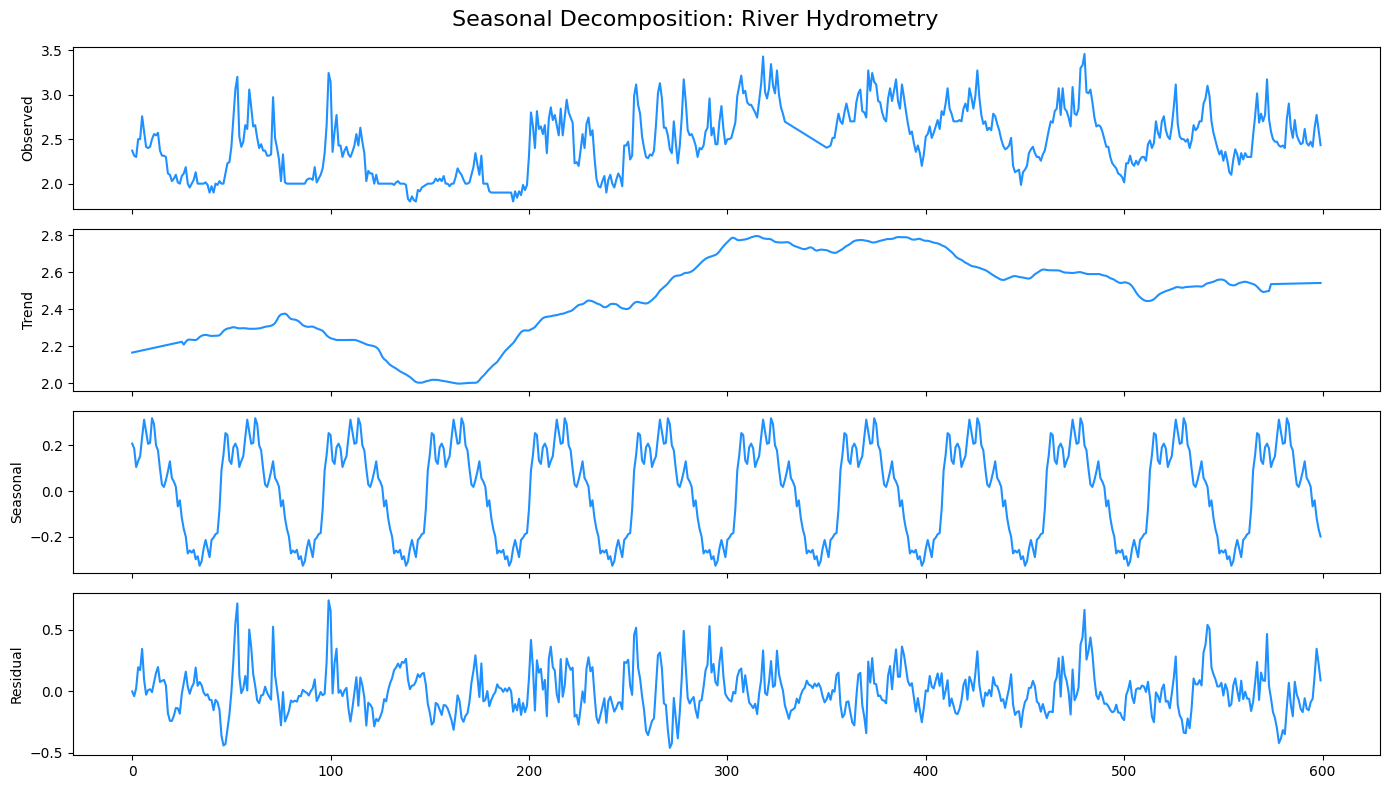

In [42]:
plot_decomposition(df['river_hydrometry'], title='River Hydrometry')

#### Lag

In [43]:
# Definir columnas principales
core_columns = ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry', 'depth_to_groundwater']

In [44]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

### Análisis exploratorio de datos

#### Visualizar los componentes estacionales

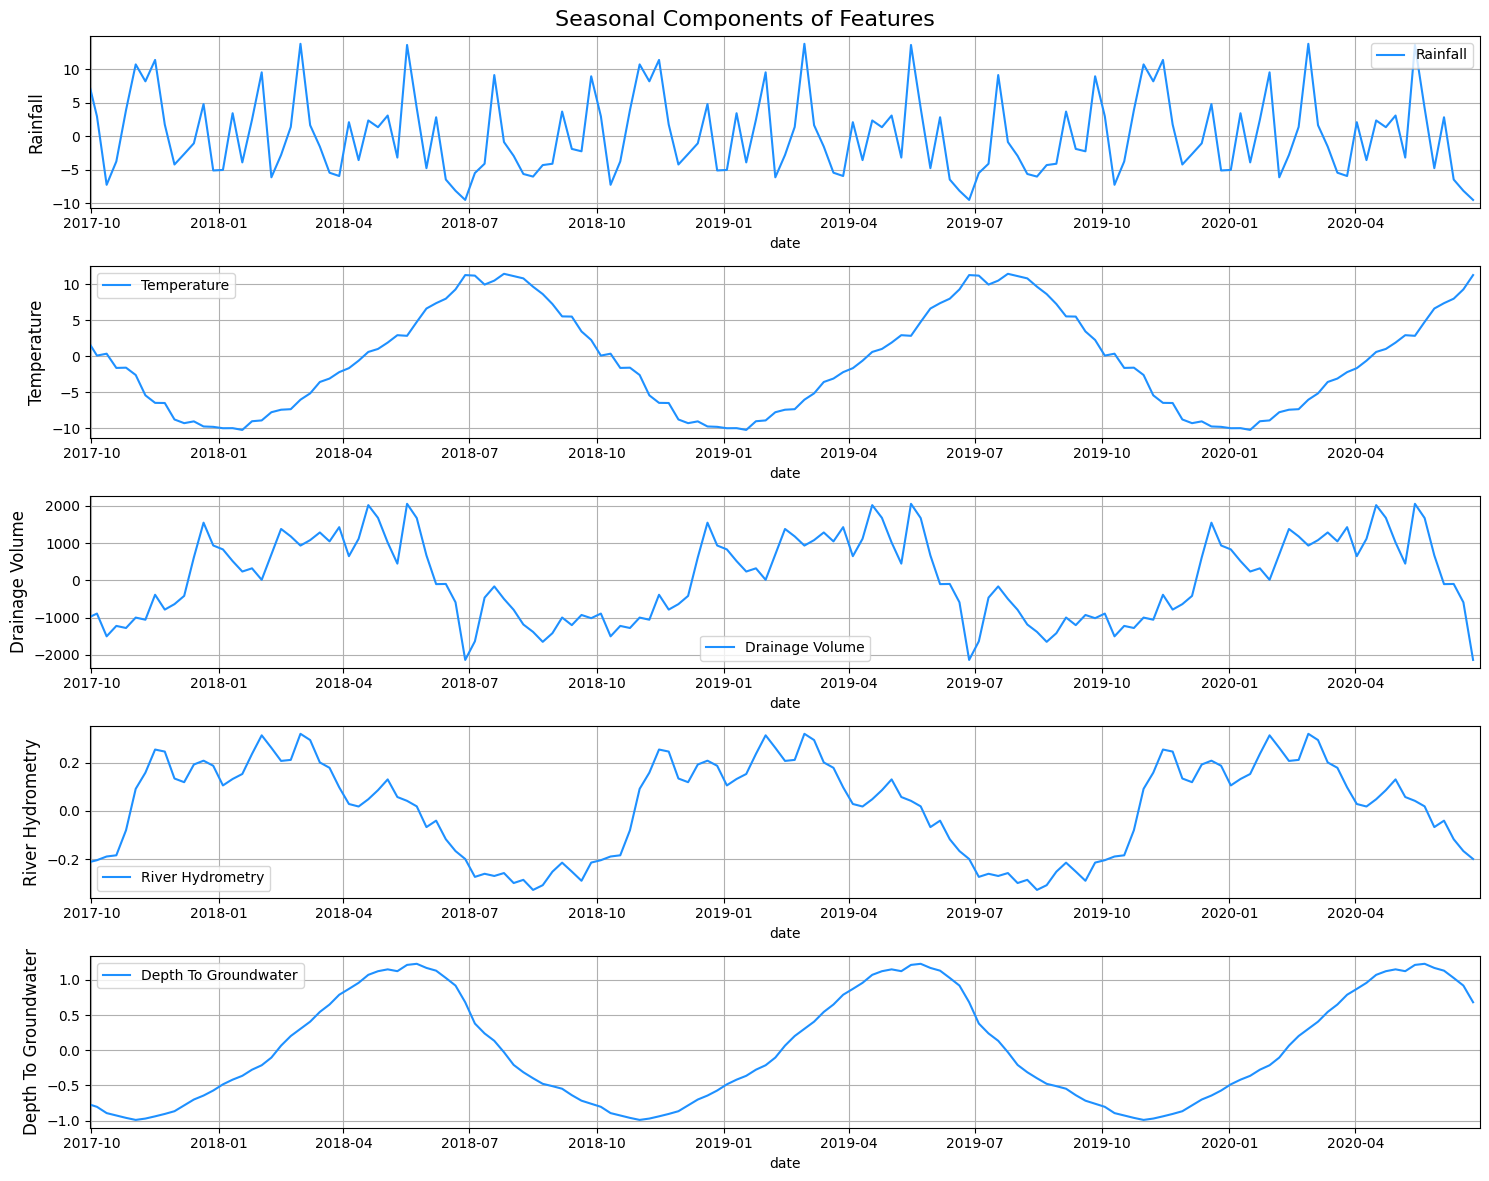

In [45]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[f"{column}_seasonal"], ax=ax[i], color='dodgerblue', label=column.replace('_', ' ').title())
    ax[i].set_ylabel(column.replace('_', ' ').title(), fontsize=12)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    ax[i].grid(True)

plt.tight_layout()
plt.show()

#### Visualizar matrices de correlación

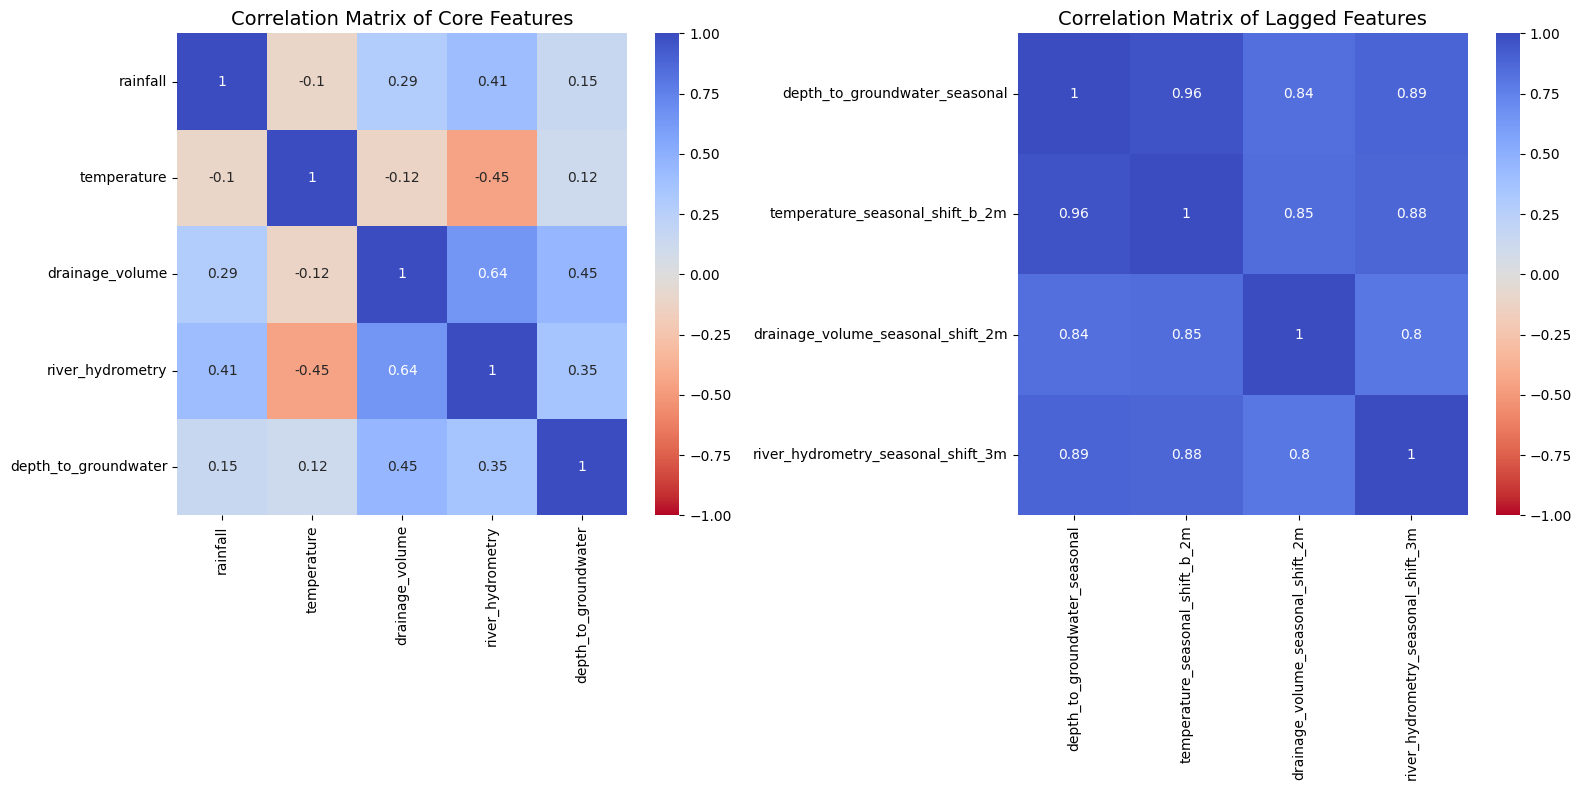

In [46]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Correlación entre las variables originales
corrmat_core = df[core_columns].corr()
sns.heatmap(corrmat_core, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=14)

# Correlación entre variables laggeadas
shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]

# Asegurar que no haya NaNs para la matriz de correlación
corrmat_lagged = df[shifted_cols].dropna().corr()
sns.heatmap(corrmat_lagged, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=14)

plt.tight_layout()
plt.show()

#### Análisis de autocorrelación

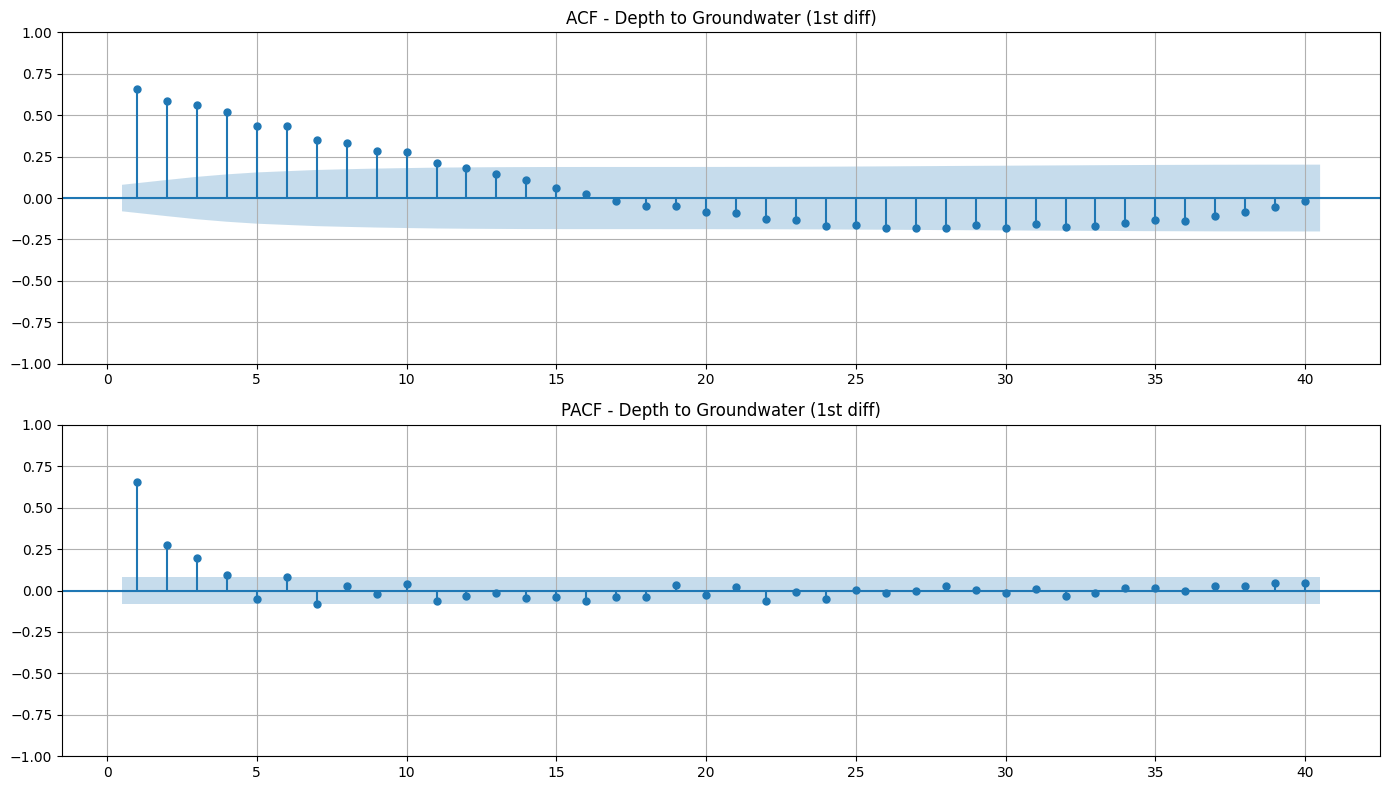

In [47]:
# ACF y PACF sobre serie diferenciada
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

# ACF: autocorrelaciones simples
plot_acf(df['depth_to_groundwater_diff_1'], lags=40, ax=ax[0], title='ACF - Depth to Groundwater (1st diff)', zero=False)
ax[0].grid(True)

# PACF: autocorrelaciones parciales
plot_pacf(df['depth_to_groundwater_diff_1'], lags=40, ax=ax[1], title='PACF - Depth to Groundwater (1st diff)', zero=False, method='ywm')
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Modelado

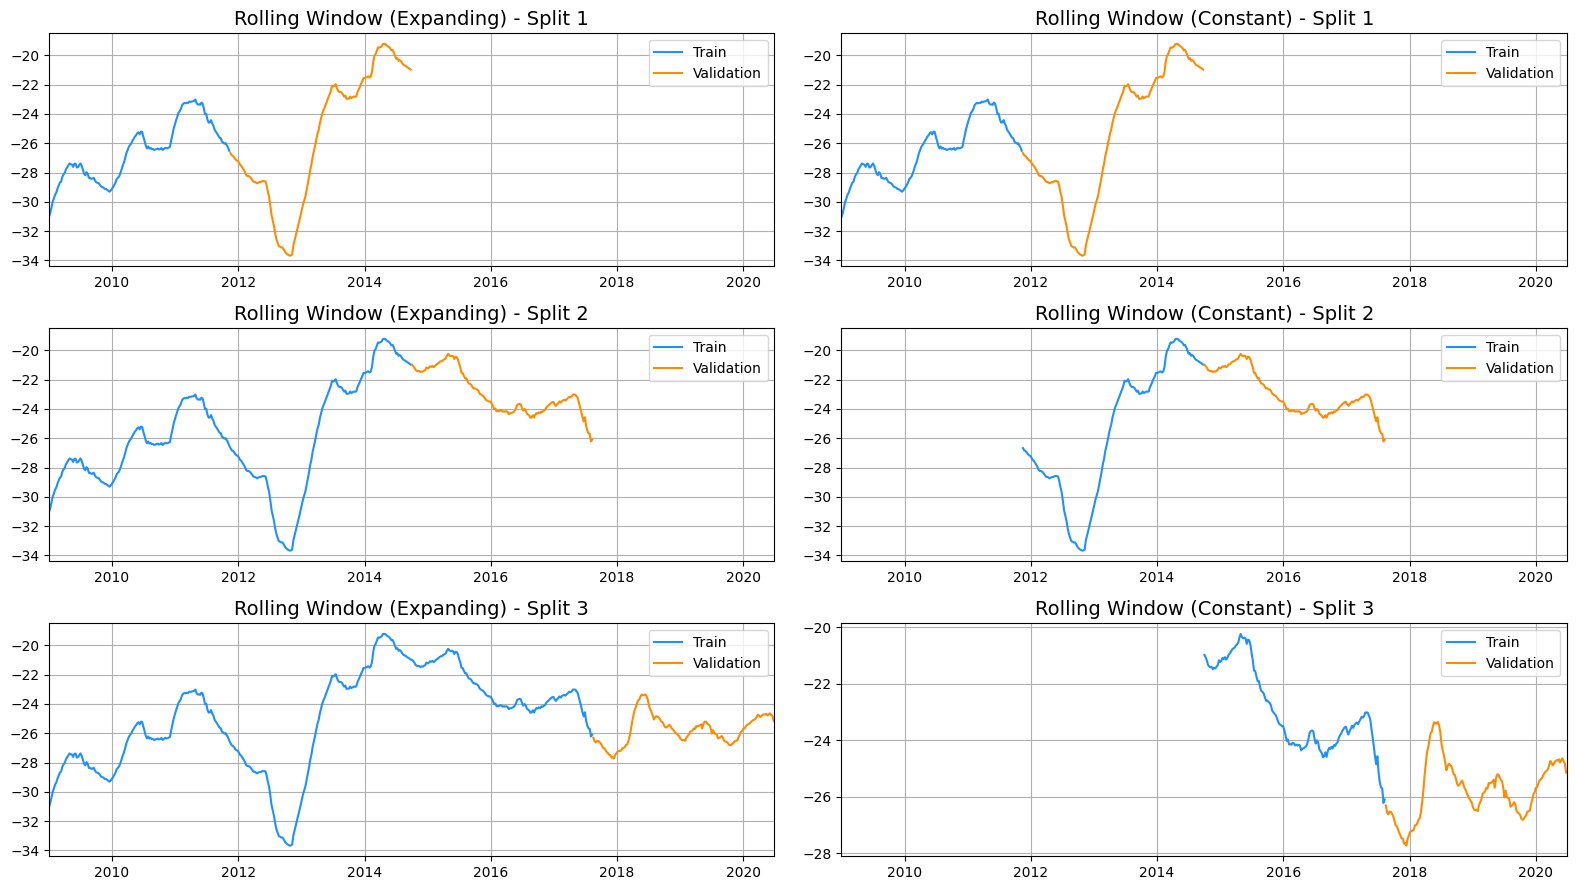

In [48]:
N_SPLITS = 3

X = df['date'].values
y = df['depth_to_groundwater'].values

tscv = TimeSeriesSplit(n_splits=N_SPLITS)

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_idx, val_idx) in enumerate(tscv.split(X)):
    # Expandable window
    ax[i, 0].plot(X[train_idx], y[train_idx], label="Train", color='dodgerblue')
    ax[i, 0].plot(X[val_idx], y[val_idx], label="Validation", color='darkorange')
    ax[i, 0].set_title(f"Rolling Window (Expanding) - Split {i+1}", fontsize=14)
    ax[i, 0].legend()
    ax[i, 0].grid(True)

    # Constant-size window (últimos len(val) puntos del train)
    last_part_idx = train_idx[-len(val_idx):]
    ax[i, 1].plot(X[last_part_idx], y[last_part_idx], label="Train", color='dodgerblue')
    ax[i, 1].plot(X[val_idx], y[val_idx], label="Validation", color='darkorange')
    ax[i, 1].set_title(f"Rolling Window (Constant) - Split {i+1}", fontsize=14)
    ax[i, 1].legend()
    ax[i, 1].grid(True)

    for j in range(2):
        ax[i, j].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

#### Modelos de series temporales univariantes

In [49]:
# Asegurarse de tener los datos clave
univariate_df = df[['date', 'depth_to_groundwater']].copy()

# Renombrar columnas a 'ds' (fecha) y 'y' (target), útil para Prophet y claridad general
univariate_df.columns = ['ds', 'y']

# División 85% entrenamiento, 15% validación
train_size = int(0.85 * len(univariate_df))
test_size = len(univariate_df) - train_size

# División del DataFrame
train = univariate_df.iloc[:train_size].copy()
valid = univariate_df.iloc[train_size:].copy()

# Separar features y targets como DataFrames individuales (útil para modelos tipo sklearn)
x_train = train[['ds']]
y_train = train[['y']]

x_valid = valid[['ds']]
y_valid = valid[['y']]

# Verificar tamaños
print(f"🧪 Tamaño entrenamiento: {len(train)}")
print(f"🧪 Tamaño validación: {len(valid)}")

🧪 Tamaño entrenamiento: 510
🧪 Tamaño validación: 90


##### Auto-ARIMA

In [50]:
# auto_arima
model = pm.auto_arima(
    y_train,                   # solo la variable objetivo (serie temporal)
    start_p=1, start_q=1,
    test='adf',                # ADF test para determinar d
    max_p=3, max_q=3,
    m=1,                       # frecuencia de la serie (1 = sin estacionalidad)
    d=None,                    # dejar que el modelo determine 'd'
    seasonal=False,           # modelo NO estacional (cambiar a True si SARIMA)
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainna

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-631.136, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-242.692, Time=0.12 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-574.047, Time=0.37 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-427.347, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-243.054, Time=0.08 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-629.209, Time=1.50 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-629.237, Time=1.03 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.779, Time=1.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-611.065, Time=0.15 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.351, Time=1.22 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-632.995, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-428.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-575.735, Time=0.06 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-631.069, Time=0.37 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-631.097, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-494.001, Time=0.18 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-612.866, Time=0.20 sec


/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-630.210, Time=1.54 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 10.842 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  510
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 319.497
Date:                Sun, 04 May 2025   AIC                           -632.995
Time:                        23:58:45   BIC                           -620.297
Sample:                             0   HQIC                          -628.016
                                - 510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9196      0.021     43.766      0.000       0.878       0.961
ma.L1         -0.4885      0.037    -13.357      0.000      -0.560      -0.417
sigma2         0.0167      0.001     24.809      0.0

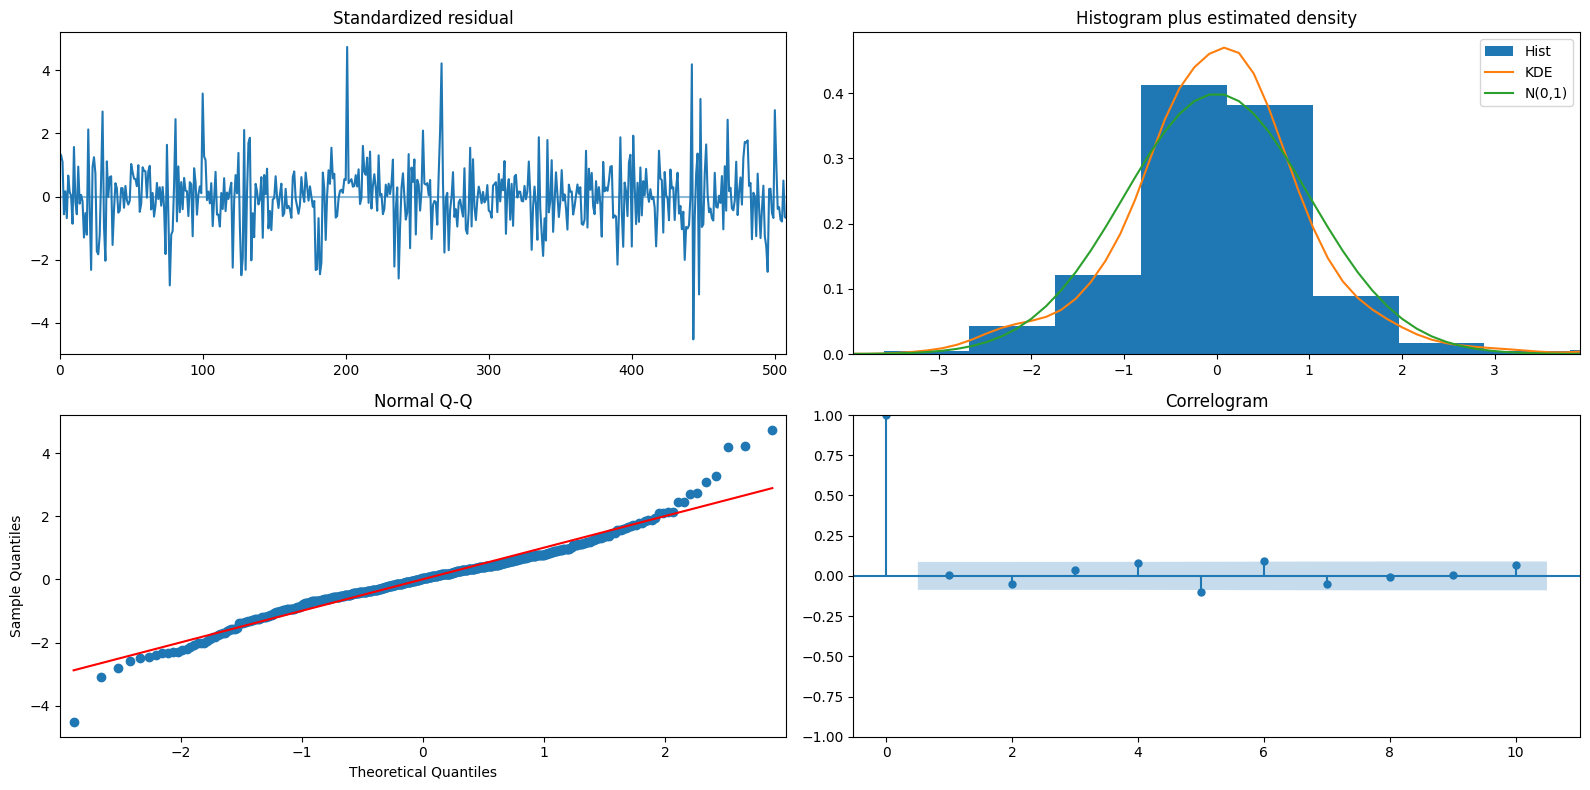

In [51]:
# Resumen y diagnóstico
print(model.summary())
model.plot_diagnostics(figsize=(16, 8))
plt.tight_layout()
plt.show()

In [52]:
# Forecast
n_periods = len(y_valid)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Índices de fechas para forecast
forecast_index = x_valid['ds'].values

/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipykernel_65297/3054011851.py:22: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/efrainnalmeida-time-series-project-tutorial/env1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


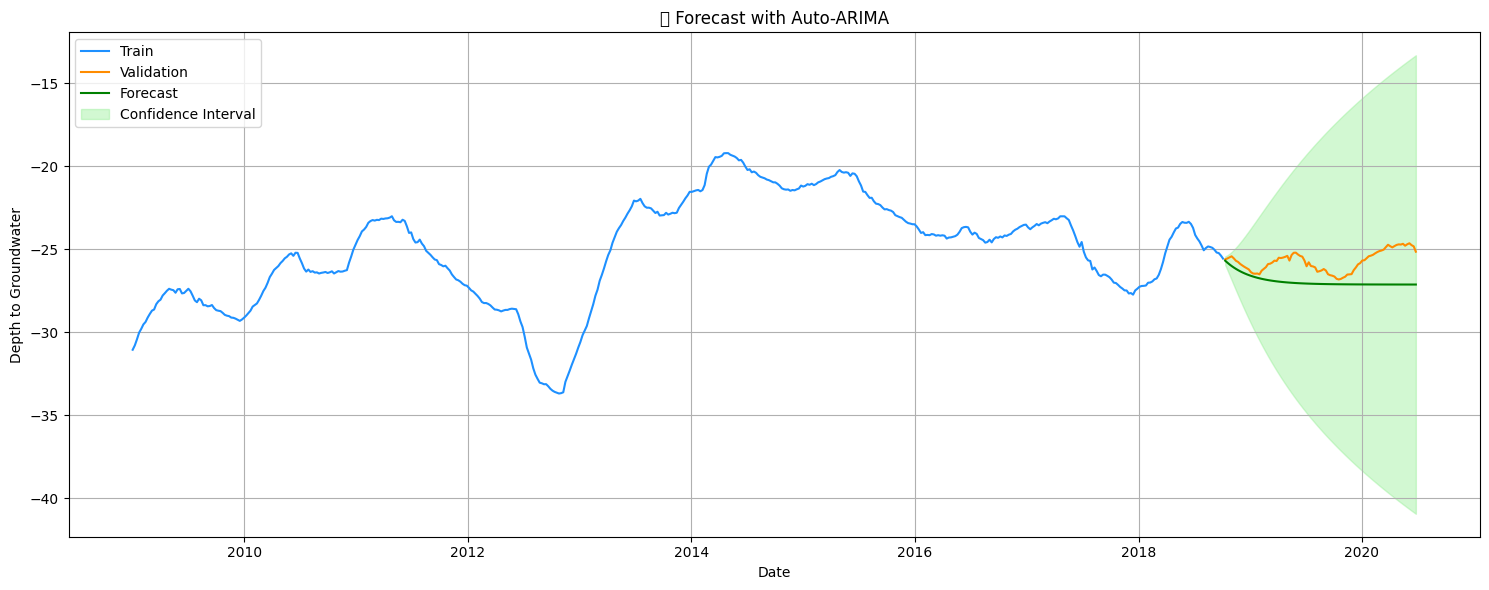

In [53]:
# Visualización
plt.figure(figsize=(15, 6))
plt.plot(x_train['ds'], y_train, label='Train', color='dodgerblue')
plt.plot(x_valid['ds'], y_valid, label='Validation', color='darkorange')
plt.plot(forecast_index, forecast, label='Forecast', color='green')

# Intervalo de confianza
plt.fill_between(
    forecast_index,
    conf_int[:, 0],
    conf_int[:, 1],
    color='lightgreen',
    alpha=0.4,
    label='Confidence Interval'
)

plt.title("🔮 Forecast with Auto-ARIMA")
plt.xlabel("Date")
plt.ylabel("Depth to Groundwater")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()